### Austo_Automobile 

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('austo_automobile+%282%29+%281%29.csv')

#### First we have upload the data set of AUSTO Automobile company as df.
**df is the AUSTO Automobile company data set.**

Let use **check the first five rows of data** to get the brief understanding of the columns or variables present in the data set.



In [3]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


Let us also check the summery of the data to get a little more understaning of quartiles, minimum, maximum values, standard deviation and count.

Count helps use to get the count of specific variable, where we can get a little knowledge on the null values if present.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


If we observe the summery, we can see Gender, Partner salary has less count of non-null values than others, so there may be few null values in it.

Let us check the data types info(), which not only gives datatype of variable but also the count of null-values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [6]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

After getting the clear vision on the null values, Gender and Partner salary has few null values to be treated.

In [7]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [8]:
df['Gender'] = df['Gender'].replace(['Femal','Femle'],'Female')

In [9]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

### CHECKING FOR DUPICATES

In [10]:
dup=df.duplicated()
df[dup]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


### REMOVING NULL VALUES

In [11]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().values[0])

In [12]:
df['Partner_salary'] = df['Partner_salary'].fillna(df['Partner_salary'].mean())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


### INDIVIDUAL ANALYSIS

**Analysis on make**

In [14]:
make_index = df['Make'].value_counts().index
make_value = df['Make'].value_counts().values

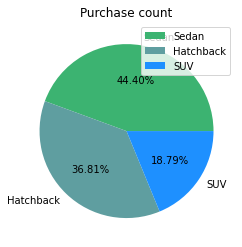

In [15]:
plt.pie(make_value,labels = make_index,autopct = "%1.2f%%",colors=['mediumseagreen','cadetblue','dodgerblue']);
plt.title('Purchase count');
plt.legend()

Most of the people are interested in Sedan model than others. 
As Hatchback is second so to increase it's sale we must announce some offers on it. 
As SUV is least first we must advertise it more and take it into public.

**Analysis on AGE**

Text(0.5, 1.0, 'Analysis on Age in Boxplot')

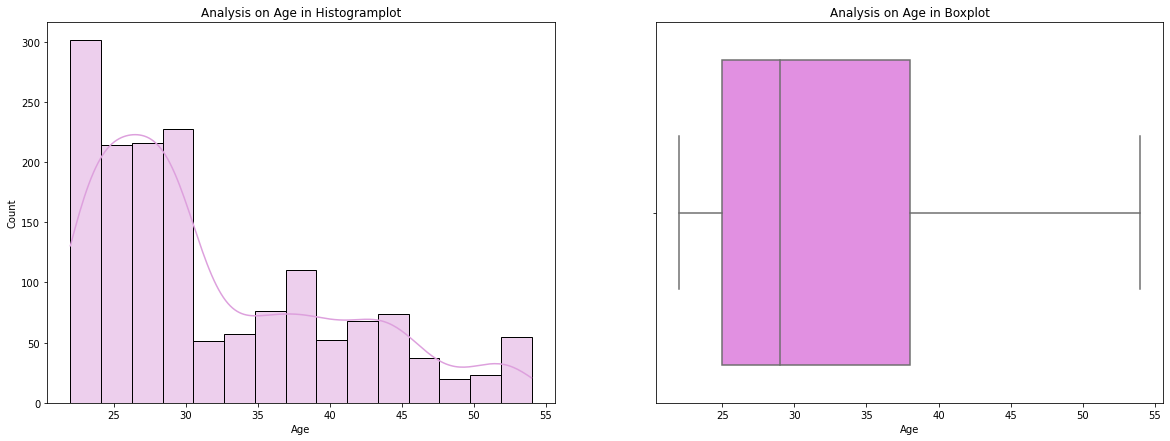

In [16]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,7));

sns.histplot(df['Age'],ax=axs[0],kde=True,color='plum');
sns.boxplot(df['Age'],ax=axs[1],color='violet');
axs[0].set_title('Analysis on Age in Histogramplot')
plt.title('Analysis on Age in Boxplot')

**Analysis on Salary**

Text(0.5, 1.0, 'Analysis on Salary in Boxplot')

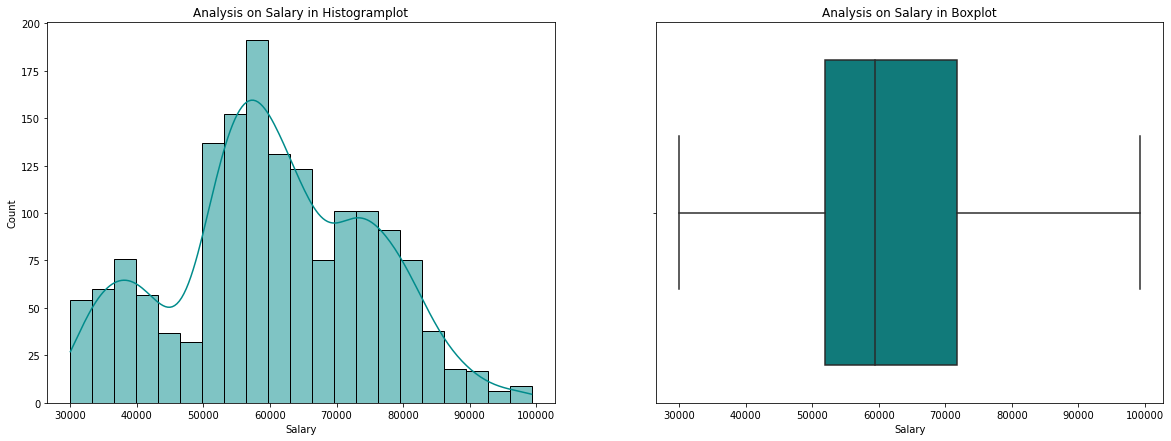

In [17]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,7));
axs[0].set_title('Analysis on Salary in Histogramplot')
sns.histplot(df['Salary'],ax=axs[0],kde=True,color='darkcyan');
sns.boxplot(df['Salary'],color='darkcyan');
axs[1].set_title('Analysis on Salary in Boxplot')

**Group analysis on Make, Gender, Working partner, Price**

Text(0.5, 1.0, 'Analysis on Price')

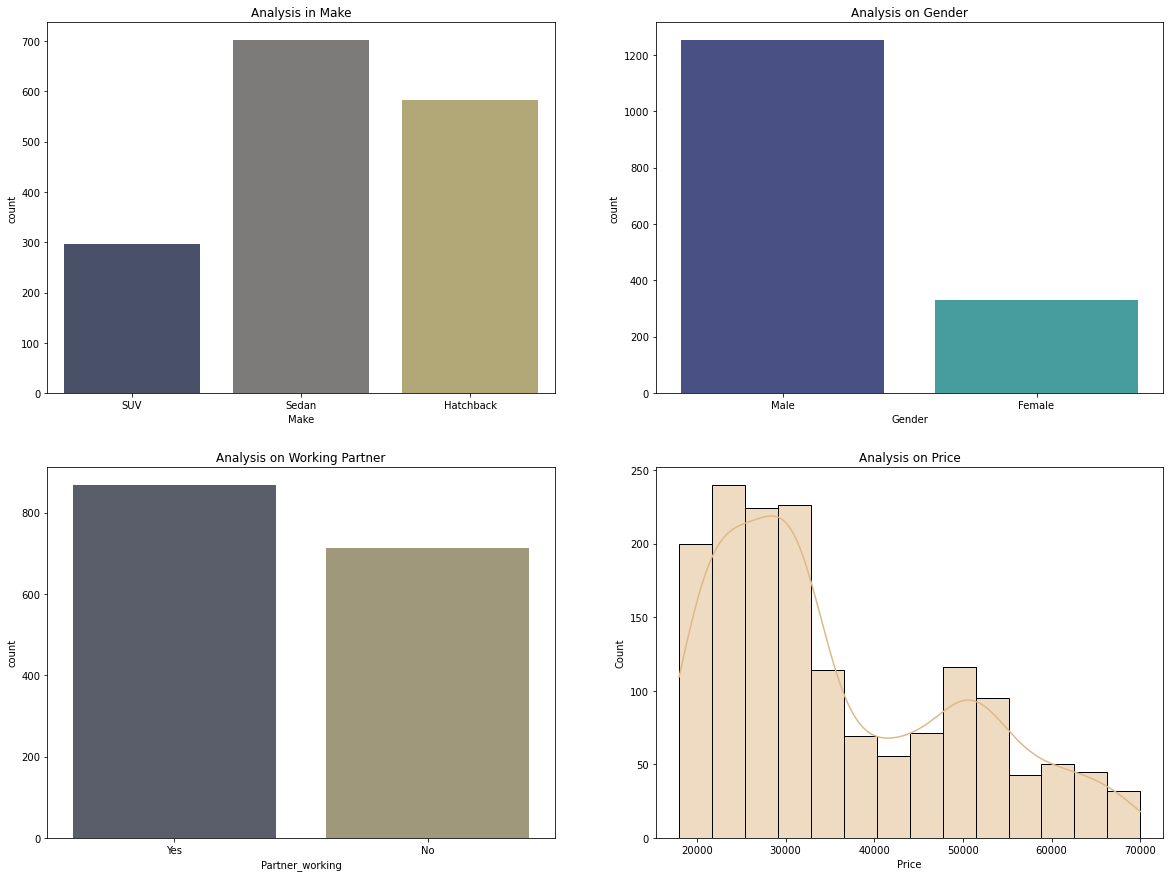

In [18]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(20,15));
sns.countplot(df['Make'],ax=axs[0,0],palette='cividis')
axs[0,0].set_title('Analysis in Make')

sns.countplot(df['Gender'],ax=axs[0,1],palette='mako')
axs[0,1].set_title('Analysis on Gender')

sns.countplot(df['Partner_working'],ax=axs[1,0],palette='cividis')
axs[1,0].set_title('Analysis on Working Partner')

sns.histplot(df['Price'],ax=axs[1,1],kde=True,color='burlywood')
axs[1,1].set_title('Analysis on Price')

**Analysis on Marital status, Education, Personal loan, House loan, Profession, Number of dependencies**

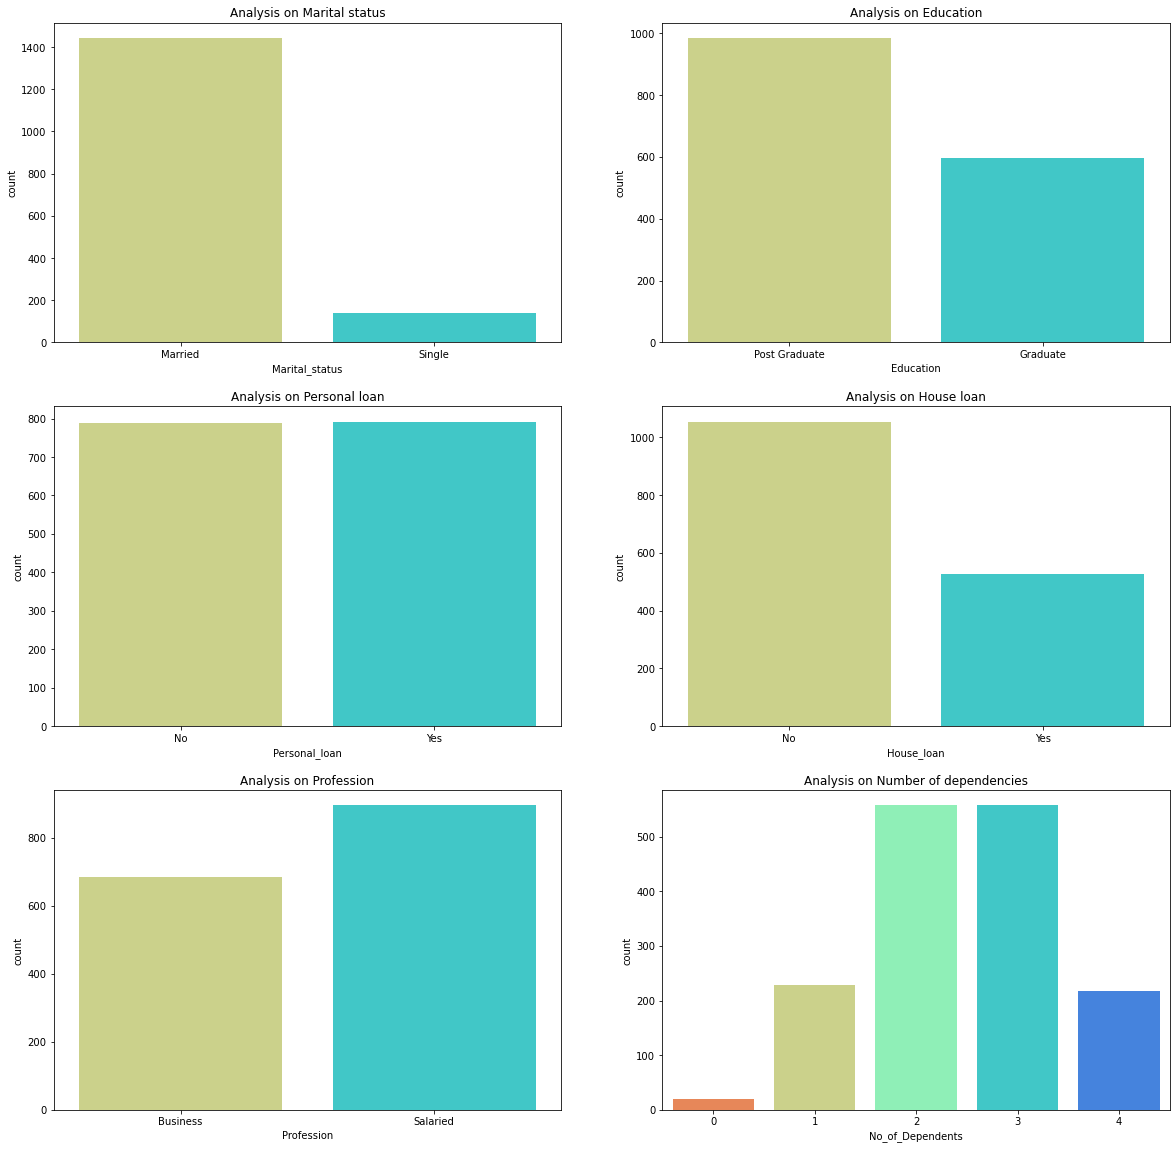

In [19]:
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(20,20));

sns.countplot(df['Marital_status'],ax=axs[0,0],palette='rainbow_r')
sns.countplot(df['Education'],ax=axs[0,1],palette='rainbow_r')
sns.countplot(df['Personal_loan'],ax=axs[1,0],palette='rainbow_r')
sns.countplot(df['House_loan'],ax=axs[1,1],palette='rainbow_r')
sns.countplot(df['Profession'],ax=axs[2,0],palette='rainbow_r');
sns.countplot(df['No_of_Dependents'],ax=axs[2,1],palette="rainbow_r")

axs[0,0].set_title('Analysis on Marital status')
axs[0,1].set_title('Analysis on Education')
axs[1,0].set_title('Analysis on Personal loan')
axs[1,1].set_title('Analysis on House loan')
axs[2,0].set_title('Analysis on Profession')
axs[2,1].set_title('Analysis on Number of dependencies')

plt.show()

**Analysis on Partner Salary**

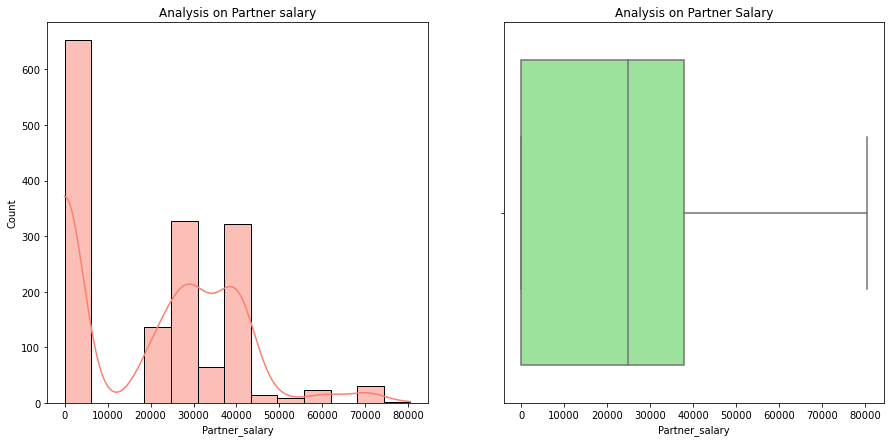

In [20]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(15,7))

sns.histplot(df['Partner_salary'],ax=axs[0],kde=True,color='salmon');
sns.boxplot(df['Partner_salary'],ax=axs[1],color='lightgreen');
plt.title('Analysis on Partner Salary')
axs[0].set_title('Analysis on Partner salary')
plt.show()

**Insights:**

By observing the above graphs or Univariate analysis,

1. No column has outliers.
2. Maximum purchases are made by the age group of range 29-31
3. According to the data, salaried people are more interested in the purchasing than business.
4. In the salaried people, people whose salary ranges from 50,000 to 65,000 per month are prefering in purchasing.
5. Sedan is the most preferred next followed by Hatchback then SUV
6. There is only a little difference in Partner working bar graph. Working partners are more when compared.
7. There is large difference in gender, there are more number of male who purchased than female.
8. There are many different priced cars. The price range is from 18,000 to 70,000. That is there are low price and high price cars.
9. Married people are preferring cars more than singles.


### OUTLIERS

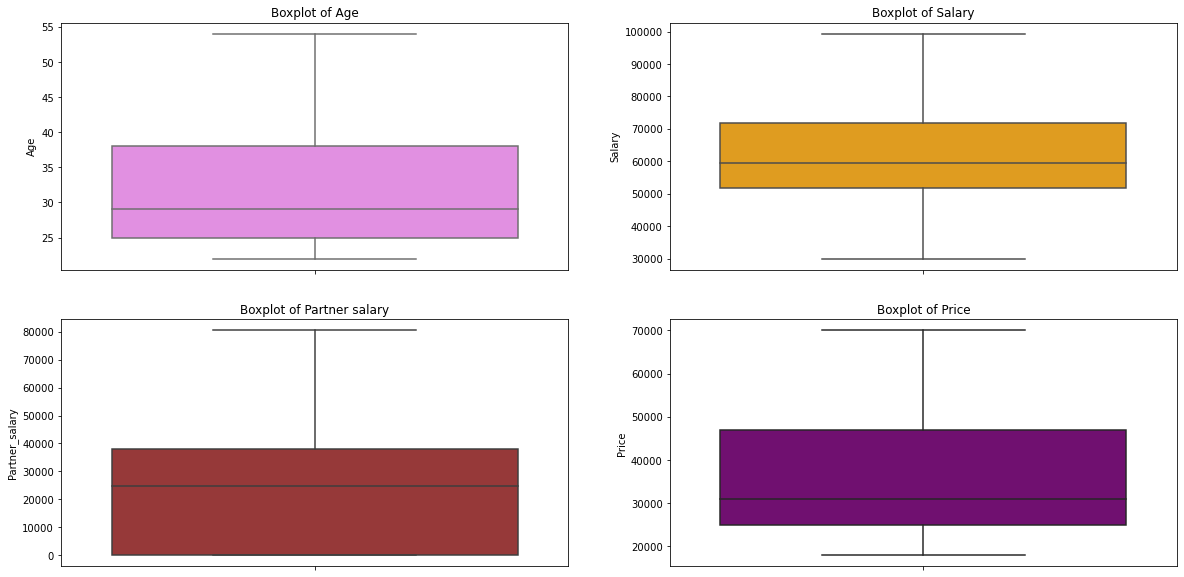

In [21]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(20,10))

sns.boxplot(y=df['Age'],ax=axs[0][0],color='Violet');
sns.boxplot(y=df['Salary'],ax=axs[0,1],color='orange');
sns.boxplot(y=df['Partner_salary'],ax=axs[1,0],color='brown');
sns.boxplot(y=df['Price'],ax=axs[1,1],color='purple');

axs[0,0].set_title('Boxplot of Age');
axs[0,1].set_title('Boxplot of Salary');
axs[1,0].set_title('Boxplot of Partner salary');
axs[1,1].set_title('Boxplot of Price');

plt.show()

From the above boxplots of Age, Salary, Partner salary, Price has no outliers. So to fill the null values we can use mean

We can observe that most of the male are purchasing the automobiles.

### Bivariate Analysis

**PRICE vs MAKE**

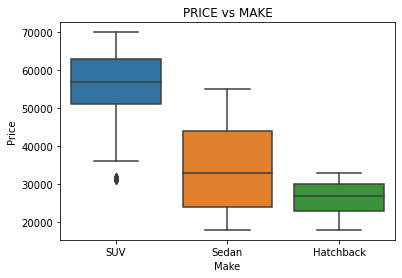

In [22]:
sns.boxplot(data=df,x='Make',y='Price')
plt.title('PRICE vs MAKE')
plt.show()

In [23]:
min_price_suv,max_price_suv = [df.loc[df['Make']=='SUV']['Price'].min(),df.loc[df['Make']=='SUV']['Price'].max()]

In [24]:
min_price_sedan,max_price_sedan = [df.loc[df['Make']=='Sedan']['Price'].min(),df.loc[df['Make']=='Sedan']['Price'].max()]

In [25]:
min_price_hatchback,max_price_hatchback = [df.loc[df['Make']=='Hatchback']['Price'].min(),df.loc[df['Make']=='Hatchback']['Price'].max()]

In [26]:
df.loc[(df['Make']=='SUV') & (df['Price']==31000)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
258,42,Female,Business,Married,Graduate,2,No,No,Yes,54300,400.0,54700,31000,SUV
503,35,Female,Salaried,Married,Post Graduate,1,Yes,Yes,No,60100,0.0,60100,31000,SUV
714,30,Female,Business,Married,Post Graduate,1,Yes,No,No,62200,0.0,62200,31000,SUV
945,28,Female,Salaried,Married,Graduate,1,Yes,No,Yes,36000,800.0,36800,31000,SUV
954,28,Female,Salaried,Married,Post Graduate,2,Yes,No,No,60400,0.0,60400,31000,SUV


There is an outlier in price of SUV, which is the least priced car in the SUV with price of 31,000

The Hatchback has the least median value and SUV has the higest.

High priced car is SUV

Low priced car is Hatchback and Sedan.

But sedan also have middle range price cars too.


**AGE vs MAKE**

Text(0.5, 1.0, 'AGE vs MAKE')

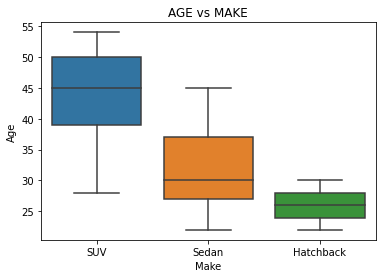

In [27]:
sns.boxplot(x=df['Make'],y=df['Age'])
plt.title('AGE vs MAKE')

In [28]:
df1=df.groupby(by=['Age','Make']).size().reset_index().rename({0:'Count'},axis=1)

In [29]:
df1

,Age,Make,Count
0,22,Hatchback,67
1,22,Sedan,27
2,23,Hatchback,71
3,23,Sedan,32
4,24,Hatchback,72
5,24,Sedan,32
6,25,Hatchback,80
7,25,Sedan,38
8,26,Hatchback,64
9,26,Sedan,32


<AxesSubplot:xlabel='Age', ylabel='Count'>

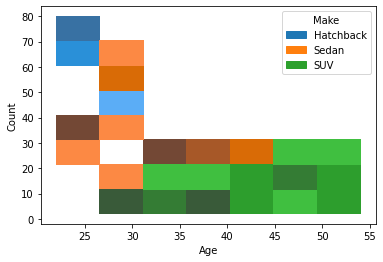

In [30]:
sns.histplot(x=df1['Age'],y=df1['Count'],hue=df1['Make'],stat='count')
# plt.title('Comparison on Age, Count, Make')

#### Insights for Age vs Make

1. Hatchback cars are only use by the age group of 22 to 30.
2. From the age 30 to 45 people are prefering Sedan or SUV.
3. Suv is the most selected car for the age group above 46.
4. If we could observe from the age 22 to 30, public are mostly prefering Hatchback and Sedan with more count that is more purchases of cars are by this age group than other age people.
5. **Hatchback** purchase count is above 60 in age group of 22 to 28.
6. In age 29 and 30, it is above 49 which is less count.
7. **Sedan** purchase is above 25 in the age group of 22 - 27.
8. People in the age of 28, 29, 30 are more likely to be interested in Sedan.
9. In this case, the purchase count of Sedan is above 55.
10. Purchases of **SUV** is observed from the peolple whose age if from 28, with very low purchase count less than 6.
11. From the age 34, we could say the purchase count has increased than above agr group but there is a pulse (increase and decrease of purchase count).

**GENDER vs MAKE**

In [31]:
pd.crosstab(df['Gender'],df['Make'])

Make,Hatchback,SUV,Sedan
Gender,,,
Female,15,173,141
Male,567,124,561


Most of the male are prefering Hatchback and Sedan.
Most of the female are prefering SUV.

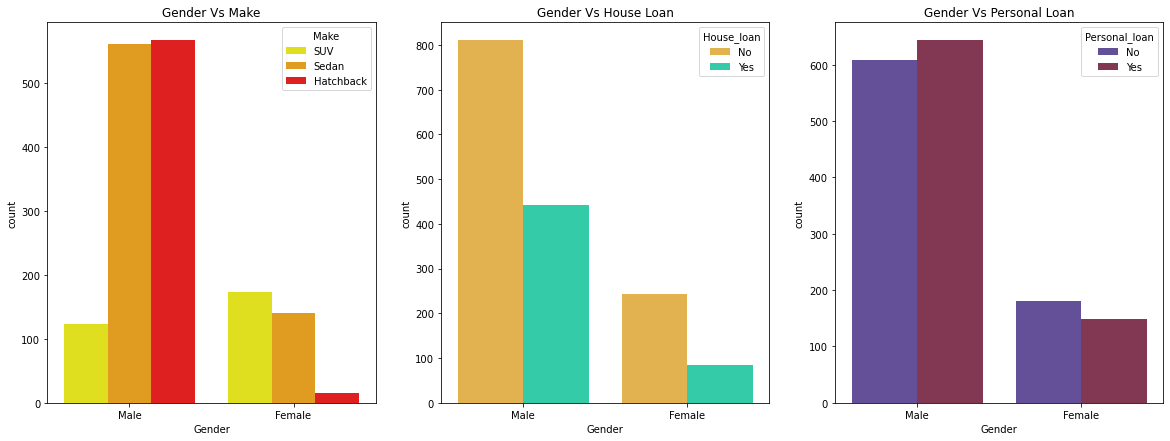

In [32]:
fig,axs =plt.subplots(nrows=1,ncols=3,figsize=(20,7))
sns.countplot(data=df,x='Gender',hue='Make',ax=axs[0],palette=['yellow','orange','red'])
sns.countplot(data=df, x='Gender', hue='House_loan',ax=axs[1],palette='turbo_r')
sns.countplot(data=df, x='Gender', hue='Personal_loan',ax=axs[2],palette='twilight')

axs[0].set_title('Gender Vs Make')
axs[1].set_title('Gender Vs House Loan')
axs[2].set_title('Gender Vs Personal Loan')
plt.show()

There is very large difference between men and women in purchasing car.

Men are most interested in purchasing that too Sedan and Hatchback models.

women are most interested in SUV.

**Other comparisons**

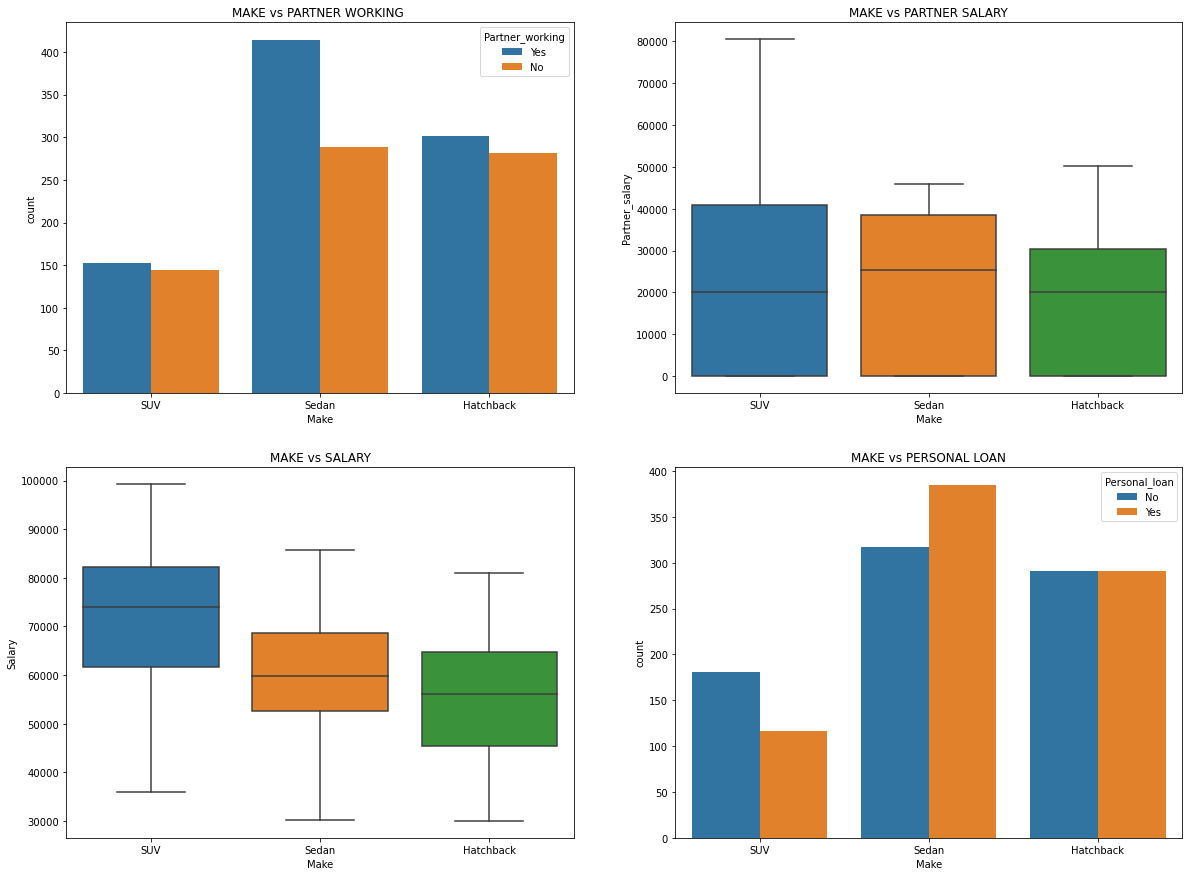

In [33]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(20,15))

sns.countplot(data=df,x='Make',hue='Partner_working',ax=axs[0,0])
sns.boxplot(data=df, x='Make',y='Partner_salary',ax=axs[0,1])
sns.boxplot(data=df, x='Make',y='Salary',ax=axs[1,0])
sns.countplot(data=df,x='Make',hue='Personal_loan',ax=axs[1,1])

axs[0,0].set_title('MAKE vs PARTNER WORKING ')
axs[0,1].set_title('MAKE vs PARTNER SALARY')
axs[1,0].set_title('MAKE vs SALARY')
axs[1,1].set_title('MAKE vs PERSONAL LOAN')

plt.show()

**AGE vs PRICE and AGE vs SALARY**

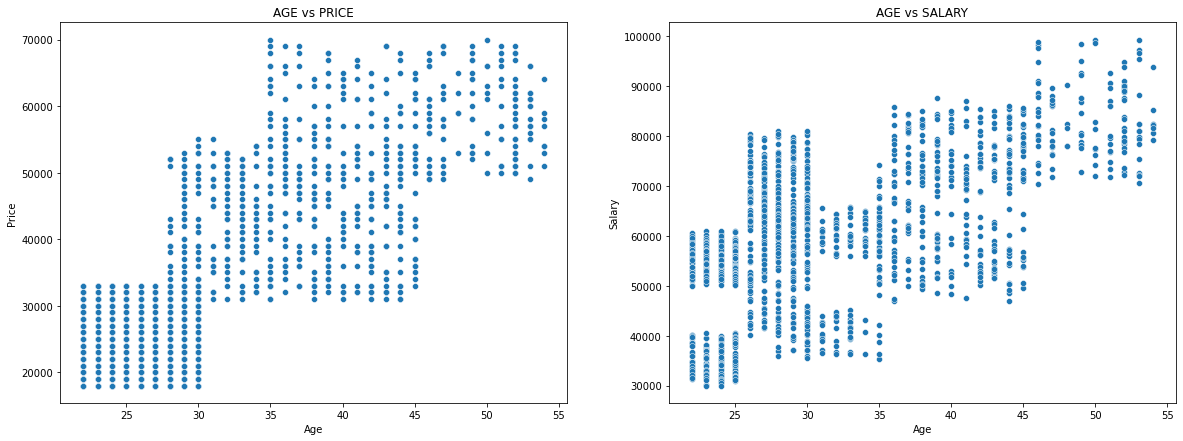

In [34]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,7))

sns.scatterplot(x=df['Age'],y=df['Price'],ax=axs[0])
sns.scatterplot(x=df['Age'],y=df['Salary'],ax=axs[1])

axs[0].set_title('AGE vs PRICE')
axs[1].set_title('AGE vs SALARY')

plt.show()

**Education vs Salary**

Text(0.5, 1.0, 'Education vs Salary')

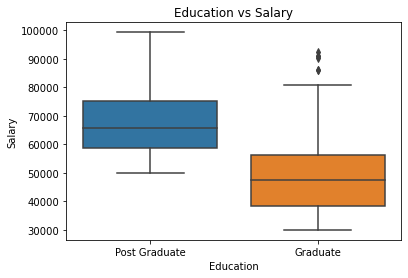

In [35]:
sns.boxplot(y=df['Salary'],x=df['Education']);
plt.title('Education vs Salary')

**MAKE vs No_of_Dependents**

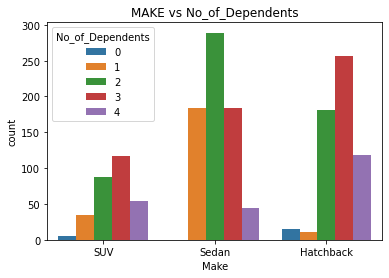

In [36]:
sns.countplot(x=df['Make'],hue=df['No_of_Dependents'])
plt.title('MAKE vs No_of_Dependents');

### MULTIVARIATE ANALYSIS

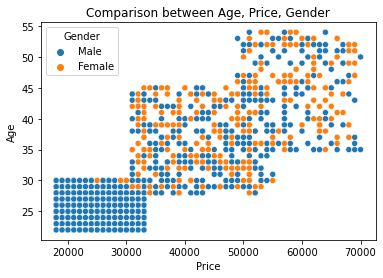

In [37]:
sns.scatterplot(x=df['Price'],y=df['Age'],hue=df['Gender'])
plt.title('Comparison between Age, Price, Gender')
plt.show()

<AxesSubplot:>

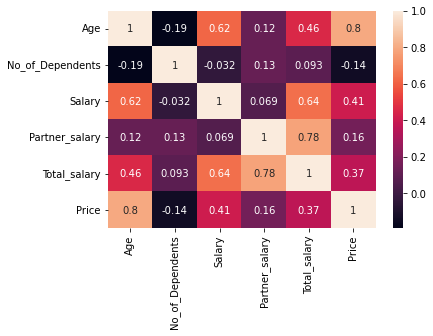

In [38]:
sns.heatmap(df.corr(),annot=True)

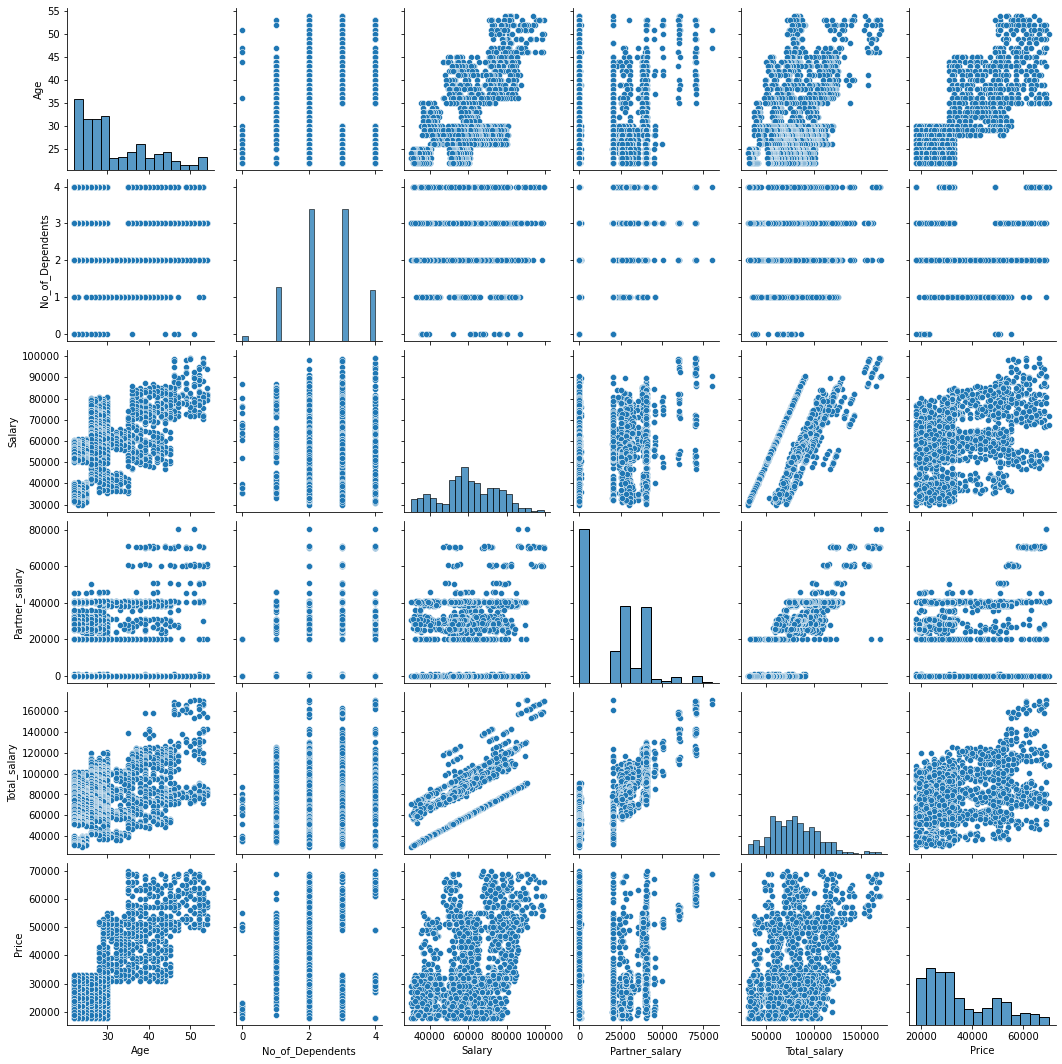

In [39]:
sns.pairplot(df)

**E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.**

**E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”**

**E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.**

**E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.**

In [40]:
df.groupby(by=['Gender','Make']).size().reset_index().rename({0:'Count'},axis=1)

,Gender,Make,Count
0,Female,Hatchback,15
1,Female,SUV,173
2,Female,Sedan,141
3,Male,Hatchback,567
4,Male,SUV,124
5,Male,Sedan,561


In [41]:
df.groupby(by=['Profession','Make']).size().reset_index().rename({0:'Count'},axis=1)

,Profession,Make,Count
0,Business,Hatchback,290
1,Business,SUV,89
2,Business,Sedan,306
3,Salaried,Hatchback,292
4,Salaried,SUV,208
5,Salaried,Sedan,396


In [42]:
df.groupby(by=['Profession','Make','Gender']).size().reset_index().rename({0:'Count'},axis=1)

,Profession,Make,Gender,Count
0,Business,Hatchback,Male,290
1,Business,SUV,Female,55
2,Business,SUV,Male,34
3,Business,Sedan,Female,50
4,Business,Sedan,Male,256
5,Salaried,Hatchback,Female,15
6,Salaried,Hatchback,Male,277
7,Salaried,SUV,Female,118
8,Salaried,SUV,Male,90
9,Salaried,Sedan,Female,91


**F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.**

**Give justification along with presenting metrics/charts used for arriving at the conclusions.**


**F1) Gender**

**F2) Personal_loan**

In [43]:
df.groupby(by='Make')['Price'].sum().reset_index()

,Make,Price
0,Hatchback,15408000
1,SUV,16580000
2,Sedan,24292000


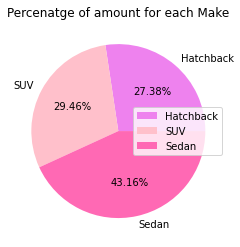

In [44]:
plt.pie(df.groupby(by='Make')['Price'].sum().values,labels=df.groupby(by='Make')['Price'].sum().index,autopct='%1.2f%%',colors=['violet','pink','hotpink']);
plt.title('Percenatge of amount for each Make');
plt.legend(loc='right')

In [45]:
df.groupby(by=['Make','Gender'])['Price'].sum().reset_index()

,Make,Gender,Price
0,Hatchback,Female,412000
1,Hatchback,Male,14996000
2,SUV,Female,9252000
3,SUV,Male,7328000
4,Sedan,Female,6031000
5,Sedan,Male,18261000


Text(0.5, 1.0, 'Comaprison between Make, Price, Gender')

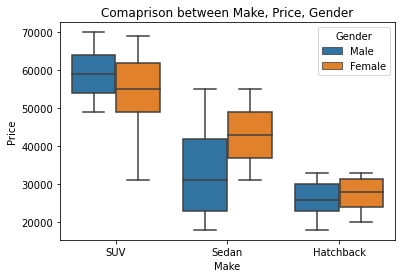

In [46]:
sns.boxplot(x=df['Make'],y=df['Price'],hue=df['Gender']);
plt.title('Comaprison between Make, Price, Gender')

**G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.**

Text(0.5, 1.0, 'Comparison on Price and whether partner working')

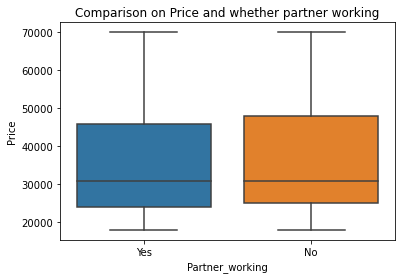

In [47]:
sns.boxplot(data=df,x='Partner_working',y='Price')
plt.title('Comparison on Price and whether partner working')

In [48]:
df.groupby(by=['Partner_working'])['Price'].median().reset_index().rename({'Price':'Price_Median'},axis=1)

,Partner_working,Price_Median
0,No,31000
1,Yes,31000


In [49]:
df.groupby(by=['Partner_working'])['Price'].sum().reset_index().rename({'Price':'Price_sum'},axis=1)

,Partner_working,Price_sum
0,No,25668000
1,Yes,30612000


In [50]:
df.loc[df['Partner_working']=='Yes']['Make'].value_counts().reset_index().rename({'Make':'total_Make_yes'},axis=1)

,index,total_Make_yes
0,Sedan,414
1,Hatchback,301
2,SUV,153


In [51]:
df.loc[df['Partner_working']=='No']['Make'].value_counts().reset_index().rename({'Make':'total_Make_no'},axis=1)

,index,total_Make_no
0,Sedan,288
1,Hatchback,281
2,SUV,144


In [52]:
df.loc[df['Partner_working']=='Yes',['Price','Make']].reset_index().groupby(by=['Make'])['Price'].sum()

Make
Hatchback     8011000
SUV           8491000
Sedan        14110000
Name: Price, dtype: int64

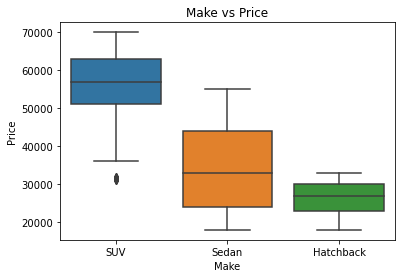

In [53]:
sns.boxplot(data=df,x='Make',y='Price')
plt.title('Make vs Price')

plt.show()

**H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.**

In [54]:
df.groupby(by=['Marital_status','Gender']).size()

Marital_status  Gender
Married         Female     307
                Male      1136
Single          Female      22
                Male       116
dtype: int64

In [55]:
df.loc[(df['Marital_status']=='Married') & (df['Gender']=='Male')].groupby(by=['Make']).size()

Make
Hatchback    484
SUV          115
Sedan        537
dtype: int64

### GODIGT Bank
#### A bank can generate revenue in a variety of ways, such as charging interest, transaction fees and financial advice. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation. The bank earns profits from the difference between the interest rates it pays on deposits and other sources of funds, and the interest rates it charges on the loans it gives out.
#### GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on the net banking, mobile banking, etc.
#### GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)

In [56]:
df = pd.read_excel('godigt_cc_data (1).xlsx')

In [57]:
df.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [58]:
df.shape

(8448, 28)

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,8448.0,4.224500e+03,2.438872e+03,1.0,2112.75,4224.5,6336.25,8448.0
card_bin_no,8448.0,4.367470e+05,3.048975e+04,376916.0,426241.00,437551.0,438439.00,524178.0
active_30,8448.0,2.923769e-01,4.548815e-01,0.0,0.00,0.0,1.00,1.0
active_60,8448.0,4.947917e-01,5.000025e-01,0.0,0.00,0.0,1.00,1.0
active_90,8448.0,6.420455e-01,4.794271e-01,0.0,0.00,1.0,1.00,1.0
cc_active30,8448.0,2.840909e-01,4.510070e-01,0.0,0.00,0.0,1.00,1.0
cc_active60,8448.0,4.844934e-01,4.997891e-01,0.0,0.00,0.0,1.00,1.0
cc_active90,8448.0,6.323390e-01,4.821970e-01,0.0,0.00,1.0,1.00,1.0
widget_products,8448.0,3.614583e+00,2.273193e+00,0.0,2.00,4.0,6.00,7.0
engagement_products,8448.0,3.991122e+00,2.572135e+00,0.0,2.00,4.0,6.00,8.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [61]:
df1=df.select_dtypes(exclude=['int64'])

In [62]:
df1.columns


Index(['card_no', 'Issuer', 'card_type', 'card_source_date', 'high_networth',
       'hotlist_flag', 'other_bank_cc_holding', 'Transactor_revolver',
       'Occupation_at_source'],
      dtype='object')

In [63]:
df.iloc[:,0:14].head(3)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,hotlist_flag
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,0,0,0,N
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,0,0,0,N
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,0,0,0,N


In [64]:
df.iloc[:,14:].head(3)

,widget_products,engagement_products,annual_income_at_source,other_bank_cc_holding,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,3,1552111,Y,27,0,0,0,0,0,T,27729,Self Employed,290000
1,4,1,4833871,Y,52,0,0,0,0,0,R,280854,0,950000
2,4,2,1345429,N,23,1,0,0,0,0,R,70587,Student,210000


In [65]:
df['hotlist_flag'].unique()

array(['N', 'Y'], dtype=object)

In [66]:
df['cc_limit'].unique()

array([290000, 950000, 210000,  80000, 220000,  50000,  20000, 260000,
       120000, 440000, 690000, 170000, 150000,  90000, 310000,  30000,
       110000, 130000, 480000, 250000, 430000, 380000, 100000,  60000,
       230000, 580000, 400000, 550000, 190000,  40000, 740000, 140000,
       760000, 930000, 770000, 280000, 360000, 570000, 720000, 750000,
       160000, 700000, 450000, 680000, 370000, 180000,  70000, 460000,
       270000, 470000, 200000, 350000, 980000, 600000, 890000, 340000,
       840000, 530000, 420000, 490000, 860000, 650000, 820000, 610000,
       920000, 300000, 660000, 330000, 320000, 960000, 810000, 410000,
       710000, 940000, 880000, 830000, 800000, 970000, 390000, 790000,
       240000, 590000, 910000, 990000, 560000, 510000, 900000, 540000,
       500000, 520000, 640000, 780000, 850000, 620000, 870000, 670000,
       630000, 730000,      0], dtype=int64)

In [67]:
df.loc[df['cc_limit']==0]

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
7620,7621,4375 51XX XXXX XXXX,437551,Visa,chartered,2011-06-24,A,0,0,0,...,38,0,0,0,0,0,NaN,0,Self Employed,0


**Credit card limit can't be zero, this is not valid data.**
**This data is to be treated.**

In [68]:
df['cc_limit'] = np.where(df['cc_limit']==0,df['cc_limit'].mode().values[0],df['cc_limit'])

In [69]:
df.loc[df['cc_limit']==0]

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit


In [70]:
df['Occupation_at_source'].unique()

array(['Self Employed', 0, 'Student', 'Salaried', 'Retired', 'Housewife'],
      dtype=object)

In [71]:
df['Occupation_at_source'] = np.where(df['Occupation_at_source']==0,df['Occupation_at_source'].mode().values[0],df['Occupation_at_source'])

In [72]:
df['Occupation_at_source'].unique()

array(['Self Employed', 'Salaried', 'Student', 'Retired', 'Housewife'],
      dtype=object)

In [73]:
df['userid'].unique()

array([   1,    2,    3, ..., 8446, 8447, 8448], dtype=int64)

In [74]:
df['card_no'].unique()

array(['4384 39XX XXXX XXXX', '4377 48XX XXXX XXXX',
       '4258 06XX XXXX XXXX', '5241 78XX XXXX XXXX',
       '4055 33XX XXXX XXXX', '4375 51XX XXXX XXXX',
       '4386 28XX XXXX XXXX', '4262 41XX XXXX XXXX', '37694 5XXXX XXXXX',
       '4477 47XX XXXX XXXX', '37691 6XXXX XXXXX'], dtype=object)

In [75]:
df['card_bin_no'].unique()

array([438439, 437748, 425806, 524178, 405533, 437551, 438628, 426241,
       376945, 447747, 376916], dtype=int64)

In [76]:
df['Issuer'].unique()

array(['Visa', 'Mastercard', 'Amex'], dtype=object)

In [77]:
df['card_type'].unique()

array(['edge', 'prosperity', 'rewards', 'indianoil', 'cashback',
       'shoprite', 'chartered', 'aura', 'gold', 'smartearn', 'prime',
       'pulse', 'platinum', 'centurion', 'elite'], dtype=object)

In [78]:
df['card_source_date'].unique()

array(['2019-09-29T00:00:00.000000000', '2002-10-30T00:00:00.000000000',
       '2013-10-05T00:00:00.000000000', ...,
       '2010-01-10T00:00:00.000000000', '2006-02-15T00:00:00.000000000',
       '2013-01-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [79]:
df['high_networth'].unique()

array(['B', 'A', 'C', 'E', 'D'], dtype=object)

In [80]:
df['active_30'].unique()

array([0, 1], dtype=int64)

In [81]:
df['active_60'].unique()

array([1, 0], dtype=int64)

In [82]:
df['active_90'].unique()

array([1, 0], dtype=int64)

In [83]:
df['cc_active30'].unique()

array([0, 1], dtype=int64)

In [84]:
df['cc_active60'].unique()

array([0, 1], dtype=int64)

In [85]:
df['cc_active90'].unique()

array([0, 1], dtype=int64)

In [86]:
df['widget_products'].unique()

array([1, 4, 6, 3, 5, 7, 2, 0], dtype=int64)

In [87]:
df['engagement_products'].unique()

array([3, 1, 2, 0, 5, 4, 6, 7, 8], dtype=int64)

In [88]:
df['annual_income_at_source'].unique()

array([1552111, 4833871, 1345429, ..., 1274059, 1271148, 1329756],
      dtype=int64)

In [89]:
df['other_bank_cc_holding'].unique()

array(['Y', 'N'], dtype=object)

In [90]:
df['bank_vintage'].unique()

array([27, 52, 23, 49, 21, 13,  9, 60, 43, 10, 38, 20, 32,  7, 55, 54, 28,
       58, 14, 57, 19, 24, 59, 16, 39,  6, 41, 33, 22, 46, 31, 45, 25, 17,
       47, 51, 42, 12, 34, 26, 35, 36, 18, 11, 15, 44, 53,  8, 50, 40, 37,
       29, 48, 56, 30], dtype=int64)

In [91]:
df['T+1_month_activity'].unique()

array([0, 1], dtype=int64)

In [92]:
df['T+2_month_activity'].unique()

array([0, 1], dtype=int64)

In [93]:
df['T+3_month_activity'].unique()

array([0, 1], dtype=int64)

In [94]:
df['T+6_month_activity'].unique()

array([0, 1], dtype=int64)

In [95]:
df.columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

In [96]:
df['T+12_month_activity'].unique()

array([0, 1], dtype=int64)

In [97]:
df['Transactor_revolver'].unique()

array(['T', 'R', nan], dtype=object)

In [98]:
df['avg_spends_l3m'].unique()

array([ 27729, 280854,  70587, ...,  42369,  57100,  45244], dtype=int64)

In [99]:
df['cc_limit'].unique()

array([290000, 950000, 210000,  80000, 220000,  50000,  20000, 260000,
       120000, 440000, 690000, 170000, 150000,  90000, 310000,  30000,
       110000, 130000, 480000, 250000, 430000, 380000, 100000,  60000,
       230000, 580000, 400000, 550000, 190000,  40000, 740000, 140000,
       760000, 930000, 770000, 280000, 360000, 570000, 720000, 750000,
       160000, 700000, 450000, 680000, 370000, 180000,  70000, 460000,
       270000, 470000, 200000, 350000, 980000, 600000, 890000, 340000,
       840000, 530000, 420000, 490000, 860000, 650000, 820000, 610000,
       920000, 300000, 660000, 330000, 320000, 960000, 810000, 410000,
       710000, 940000, 880000, 830000, 800000, 970000, 390000, 790000,
       240000, 590000, 910000, 990000, 560000, 510000, 900000, 540000,
       500000, 520000, 640000, 780000, 850000, 620000, 870000, 670000,
       630000, 730000], dtype=int64)

### TREATING NULL VALUES

In [100]:
df.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [101]:
df['Transactor_revolver'].unique()

array(['T', 'R', nan], dtype=object)

In [102]:
df['Transactor_revolver']=df['Transactor_revolver'].fillna(df['Transactor_revolver'].mode().values[0])

In [103]:
df['Transactor_revolver'].isnull().sum()

0

In [104]:
df.isnull().sum()

userid                     0
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

### OUTLIERS 

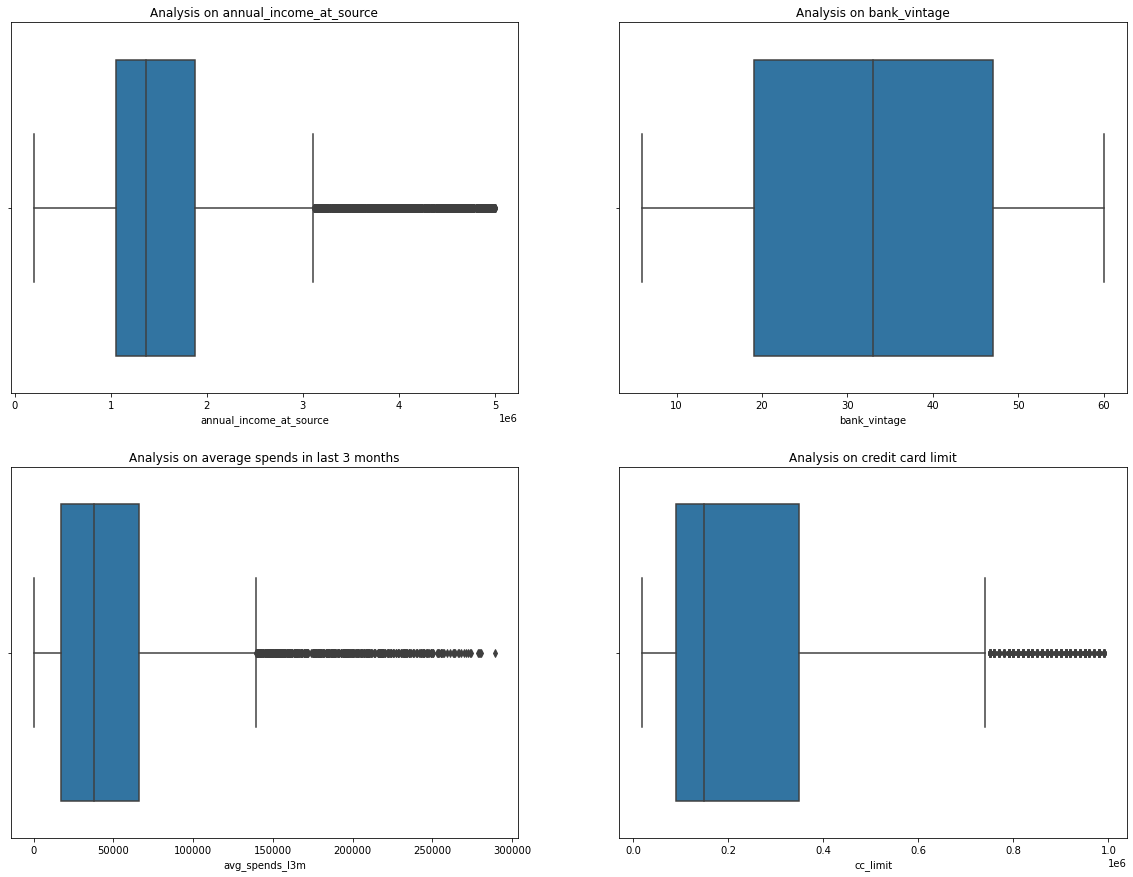

In [105]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,15))

sns.boxplot(df['annual_income_at_source'],ax=axs[0,0])
sns.boxplot(df['bank_vintage'],ax=axs[0,1])
sns.boxplot(df['avg_spends_l3m'],ax=axs[1,0])
sns.boxplot(df['cc_limit'],ax=axs[1,1])

axs[0,0].set_title('Analysis on annual_income_at_source')
axs[0,1].set_title('Analysis on bank_vintage')
axs[1,0].set_title('Analysis on average spends in last 3 months')
axs[1,1].set_title('Analysis on credit card limit')

plt.show()

In [106]:
def detect_outliers(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    upperlimit = q3 + (1.5 * iqr)
    lowerlimit = q1 - (1.5 * iqr)
    return upperlimit, lowerlimit

In [107]:
up_lim , lr_lim = detect_outliers(df['annual_income_at_source'])

In [108]:
df['annual_income_at_source'] = np.where(df['annual_income_at_source']>up_lim,up_lim,df['annual_income_at_source'])
df['annual_income_at_source'] = np.where(df['annual_income_at_source']<lr_lim,lr_lim,df['annual_income_at_source'])

In [109]:
df['avg_spends_l3m']

0        27729
1       280854
2        70587
3         9156
4        38108
         ...  
8443    108713
8444     42369
8445      8459
8446     57100
8447     45244
Name: avg_spends_l3m, Length: 8448, dtype: int64

In [110]:
up_lim , lr_lim = detect_outliers(df['avg_spends_l3m'])

In [111]:
df['avg_spends_l3m'] = np.where(df['avg_spends_l3m']>up_lim,up_lim,df['avg_spends_l3m'])
df['avg_spends_l3m'] = np.where(df['avg_spends_l3m']<lr_lim,lr_lim,df['avg_spends_l3m'])

In [112]:
up_lim , lr_lim = detect_outliers(df['cc_limit'])

In [113]:
df['cc_limit'] = np.where(df['cc_limit']>up_lim,up_lim,df['cc_limit'])
df['cc_limit'] = np.where(df['cc_limit']<lr_lim,lr_lim,df['cc_limit'])

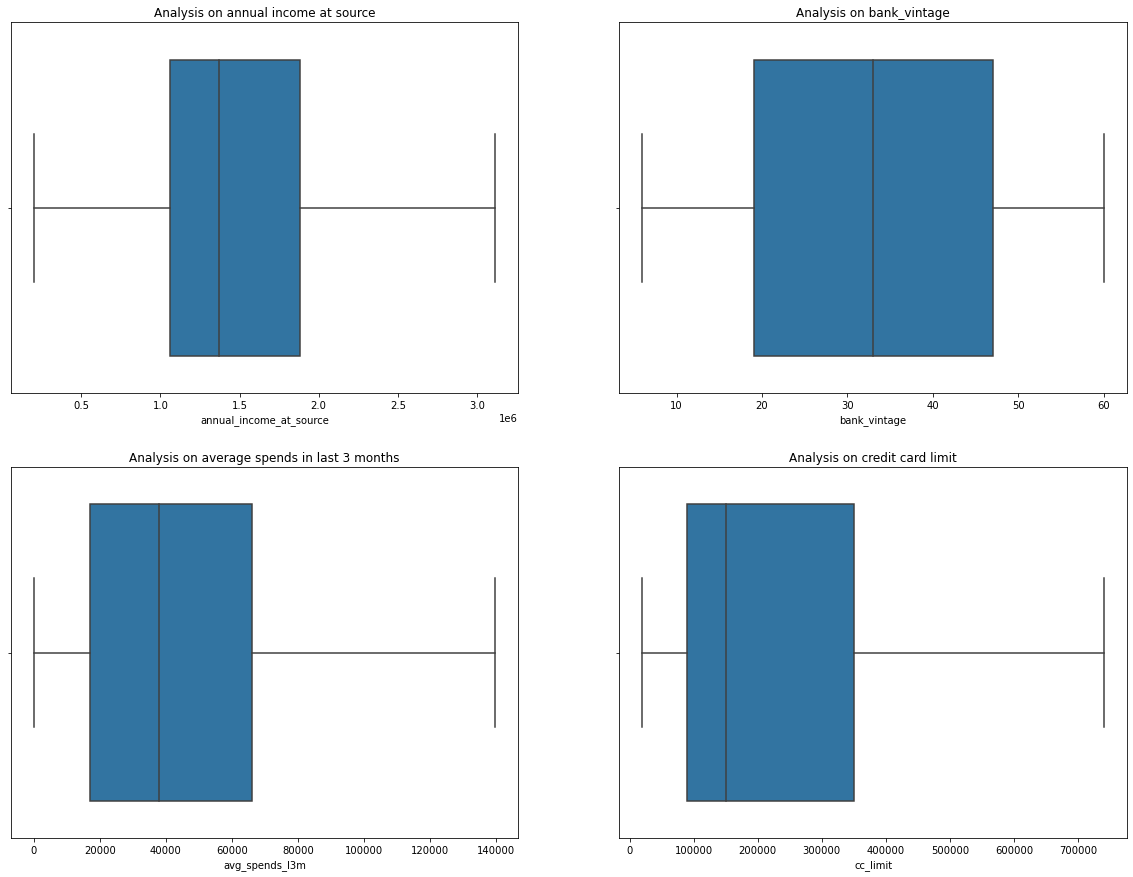

In [114]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,15))

sns.boxplot(df['annual_income_at_source'],ax=axs[0,0])
sns.boxplot(df['bank_vintage'],ax=axs[0,1])
sns.boxplot(df['avg_spends_l3m'],ax=axs[1,0])
sns.boxplot(df['cc_limit'],ax=axs[1,1])

axs[0,0].set_title('Analysis on annual income at source')
axs[0,1].set_title('Analysis on bank_vintage')
axs[1,0].set_title('Analysis on average spends in last 3 months')
axs[1,1].set_title('Analysis on credit card limit')

plt.show()

As observed from numerical variables, we have outliers in Analysis on annual income at source, Analysis on average spends in last 3 months, Analysis on credit card limit.

We have treated the outliers using boxplot method.

All the outliers are bought to the maximum value of the boxplot.

All the outliers are treated now.

### UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'Analysis on Card network issuer')

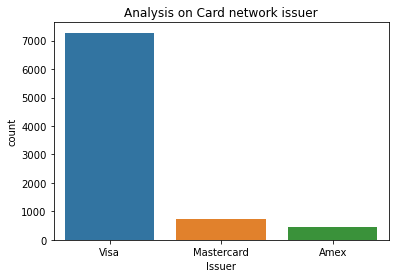

In [115]:
sns.countplot(x=df['Issuer'])
plt.title('Analysis on Card network issuer')

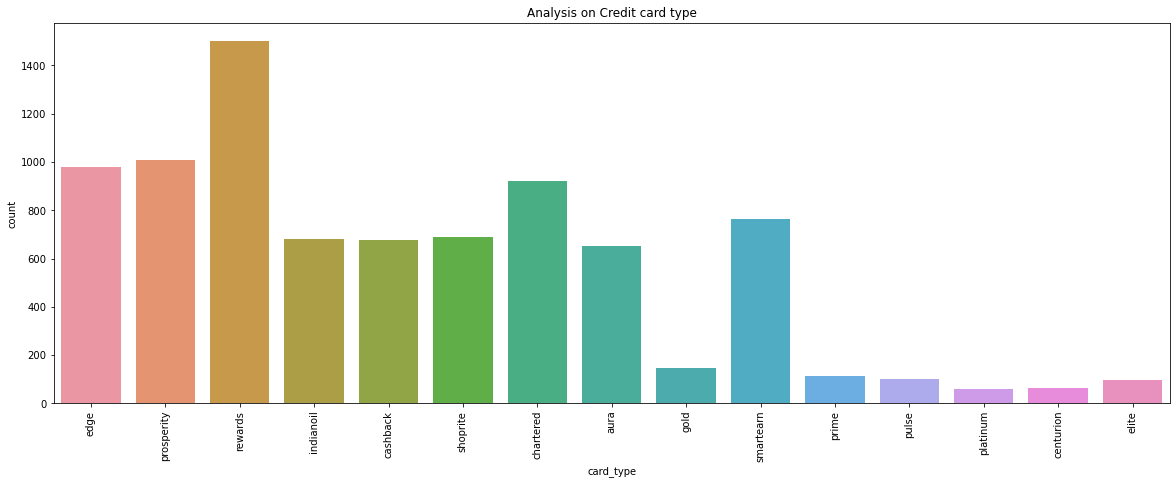

In [116]:
plt.figure(figsize=(20,7))
sns.countplot(x=df['card_type'])
plt.title('Analysis on Credit card type')
plt.xticks(rotation=90)
plt.show()

In [117]:
df["day"] = df['card_source_date'].map(lambda x: x.day)
df["month"] = df['card_source_date'].map(lambda x: x.month)
df["year"] = df['card_source_date'].map(lambda x: x.year)

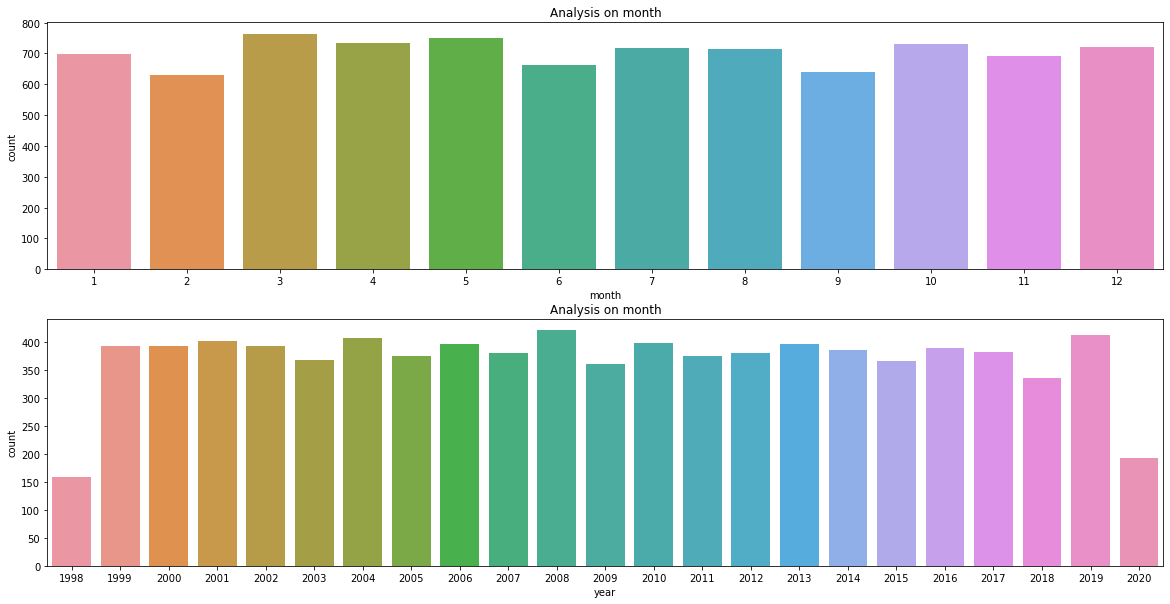

In [118]:
fig,axs=plt.subplots(nrows=2,ncols=1,figsize=(20,10))
sns.countplot(df['month'],ax=axs[0])
sns.countplot(df['year'],ax=axs[1])
axs[0].set_title('Analysis on month');
axs[1].set_title('Analysis on month');

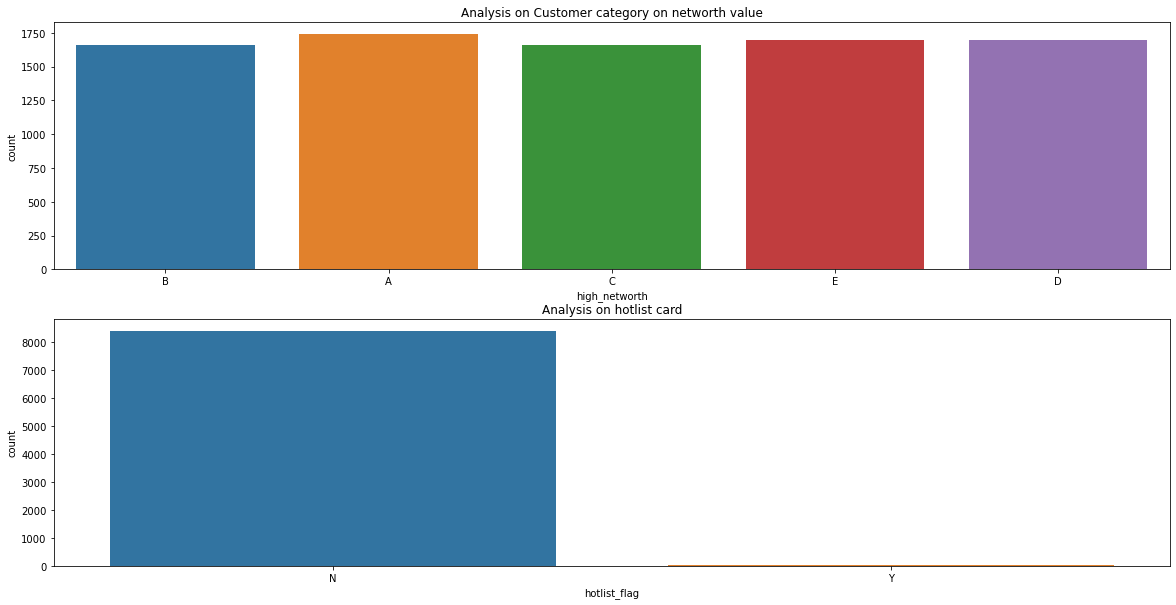

In [119]:
fig,axs=plt.subplots(nrows=2,ncols=1,figsize=(20,10))

sns.countplot(df['high_networth'],ax=axs[0])
sns.countplot(df['hotlist_flag'],ax=axs[1])
axs[0].set_title('Analysis on Customer category on networth value');
axs[1].set_title('Analysis on hotlist card');
plt.show()

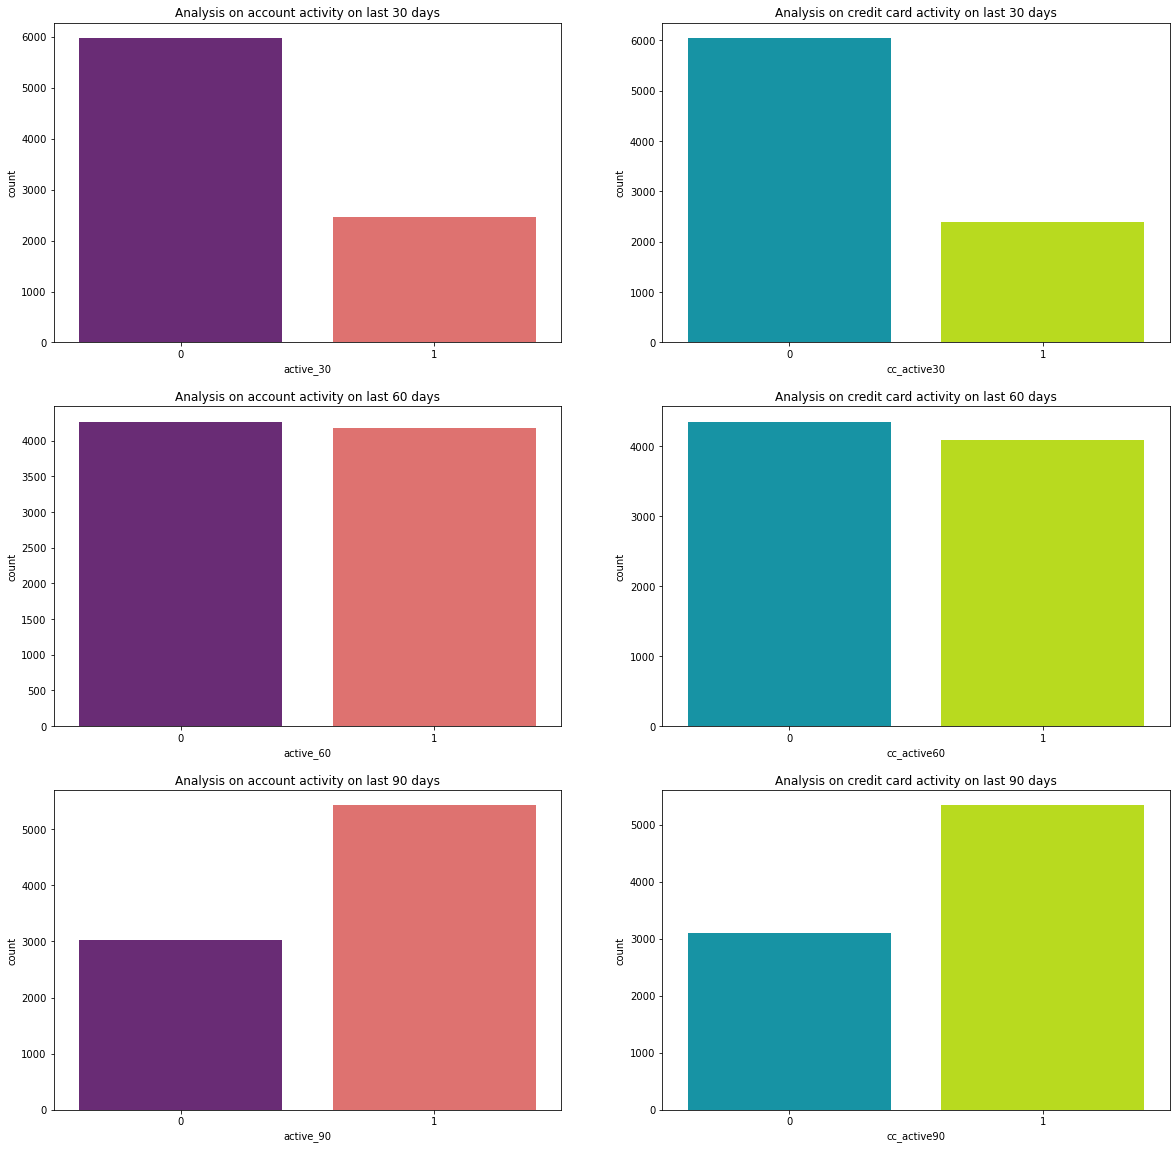

In [120]:
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(20,20))


sns.countplot(df['active_30'],ax=axs[0,0],palette='magma')
sns.countplot(df['active_60'],ax=axs[1,0],palette='magma')
sns.countplot(df['active_90'],ax=axs[2,0],palette='magma')

axs[0,0].set_title('Analysis on account activity on last 30 days');
axs[1,0].set_title('Analysis on account activity on last 60 days');
axs[2,0].set_title('Analysis on account activity on last 90 days');

sns.countplot(df['cc_active30'],ax=axs[0,1],palette='nipy_spectral')
sns.countplot(df['cc_active60'],ax=axs[1,1],palette='nipy_spectral')
sns.countplot(df['cc_active90'],ax=axs[2,1],palette='nipy_spectral')

axs[0,1].set_title('Analysis on credit card activity on last 30 days');
axs[1,1].set_title('Analysis on credit card activity on last 60 days');
axs[2,1].set_title('Analysis on credit card activity on last 90 days');


plt.show()

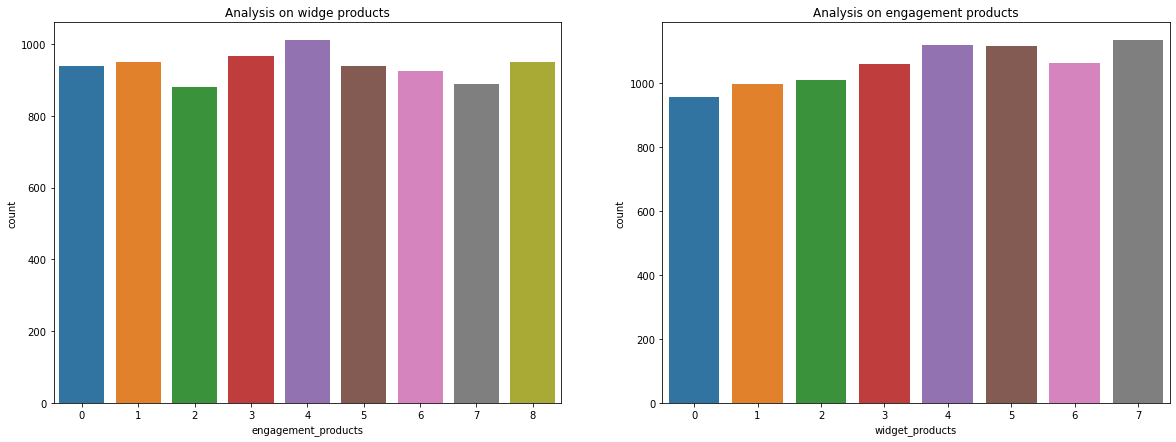

In [121]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,7))
sns.countplot(df['engagement_products'],ax=axs[0])
sns.countplot(df['widget_products'],ax=axs[1])
axs[0].set_title('Analysis on widge products');
axs[1].set_title('Analysis on engagement products');

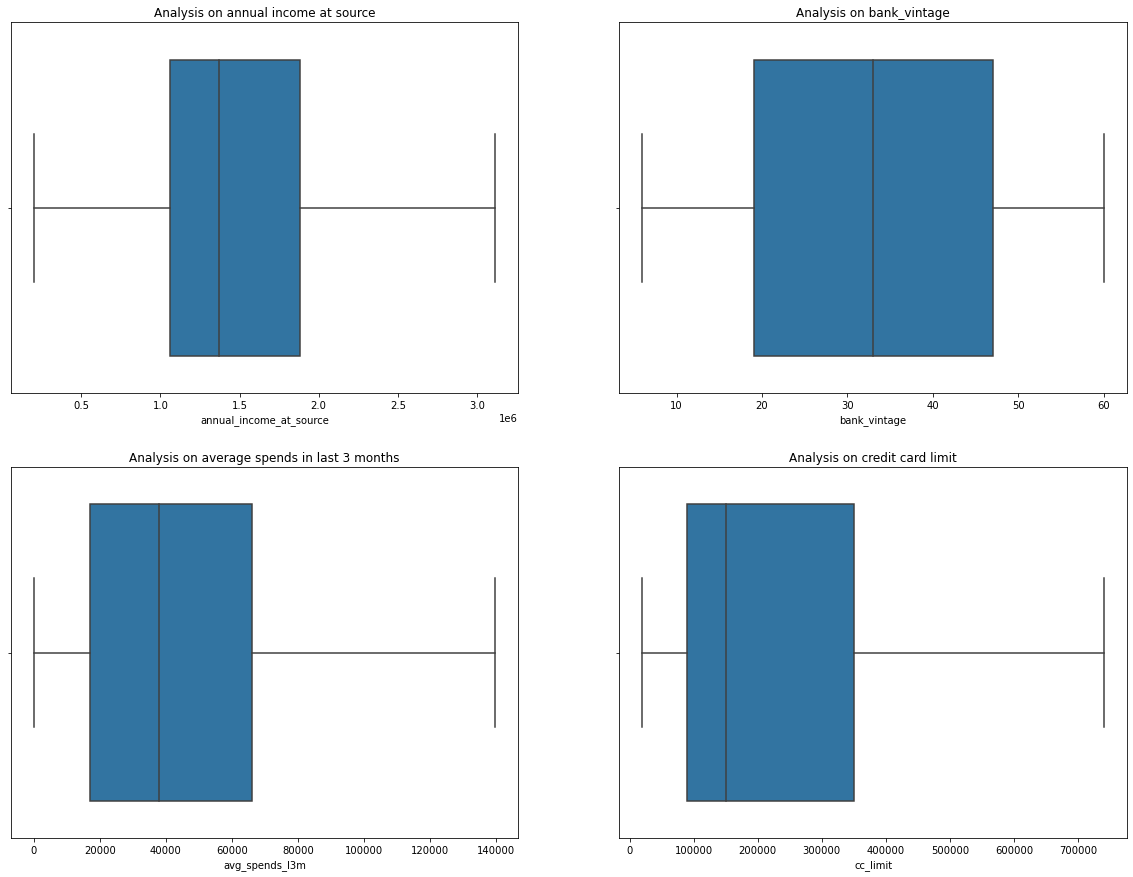

In [122]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,15))

sns.boxplot(df['annual_income_at_source'],ax=axs[0,0])
sns.boxplot(df['bank_vintage'],ax=axs[0,1])
sns.boxplot(df['avg_spends_l3m'],ax=axs[1,0])
sns.boxplot(df['cc_limit'],ax=axs[1,1])

axs[0,0].set_title('Analysis on annual income at source')
axs[0,1].set_title('Analysis on bank_vintage')
axs[1,0].set_title('Analysis on average spends in last 3 months')
axs[1,1].set_title('Analysis on credit card limit')

plt.show()

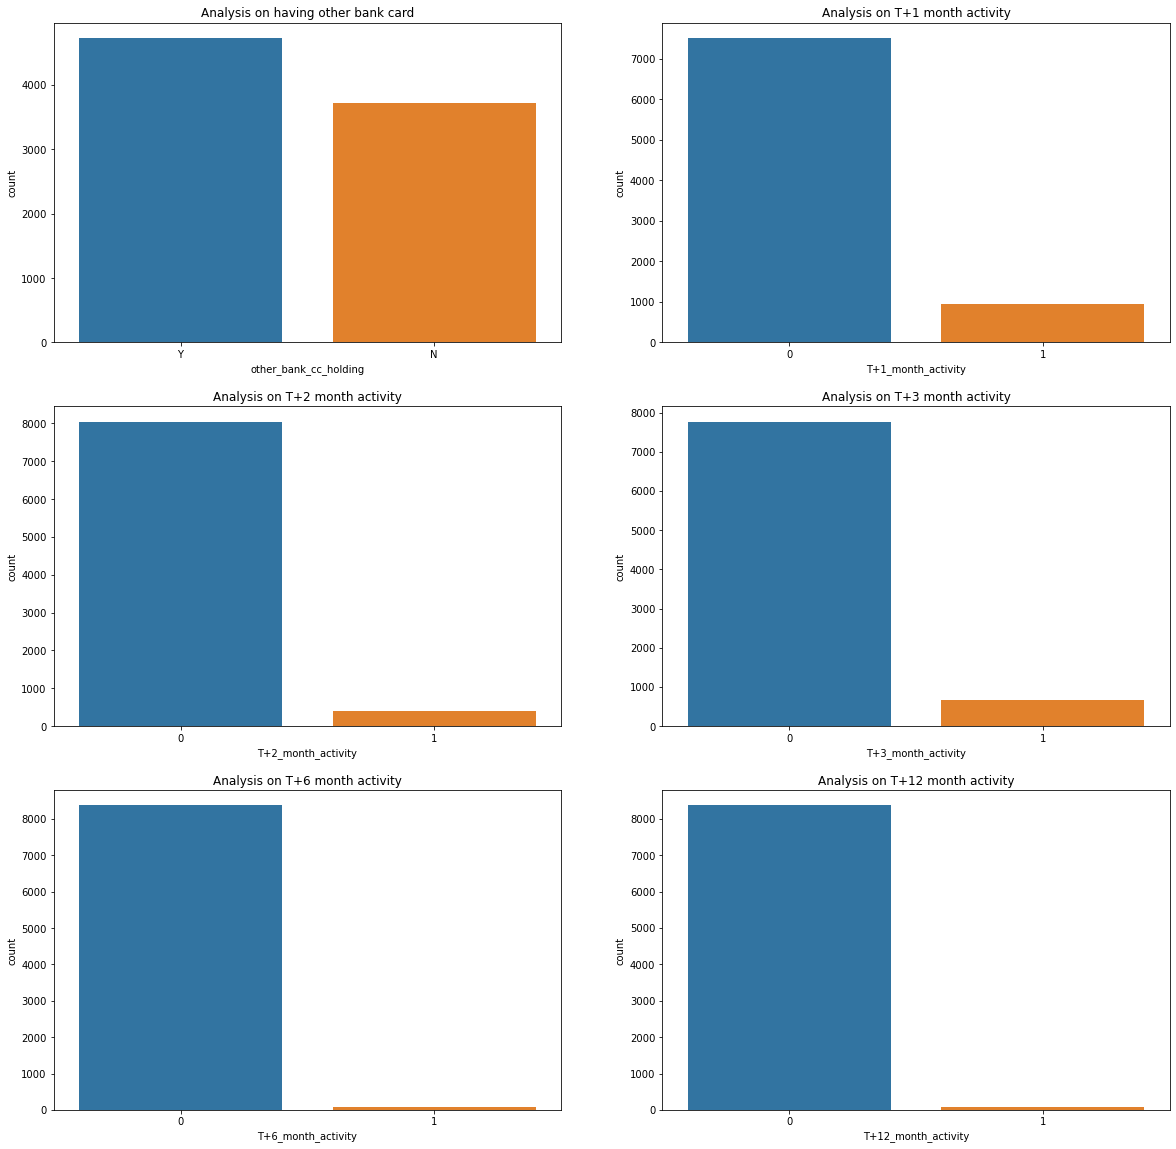

In [123]:
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(20,20))

sns.countplot(df['other_bank_cc_holding'],ax=axs[0,0])
sns.countplot(df['T+1_month_activity'],ax=axs[0,1])
sns.countplot(df['T+2_month_activity'],ax=axs[1,0])
sns.countplot(df['T+3_month_activity'],ax=axs[1,1])
sns.countplot(df['T+6_month_activity'],ax=axs[2,0])
sns.countplot(df['T+12_month_activity'],ax=axs[2,1])

axs[0,0].set_title('Analysis on having other bank card')
axs[0,1].set_title('Analysis on T+1 month activity')
axs[1,0].set_title('Analysis on T+2 month activity')
axs[1,1].set_title('Analysis on T+3 month activity')
axs[2,0].set_title('Analysis on T+6 month activity')
axs[2,1].set_title('Analysis on T+12 month activity')

plt.show()

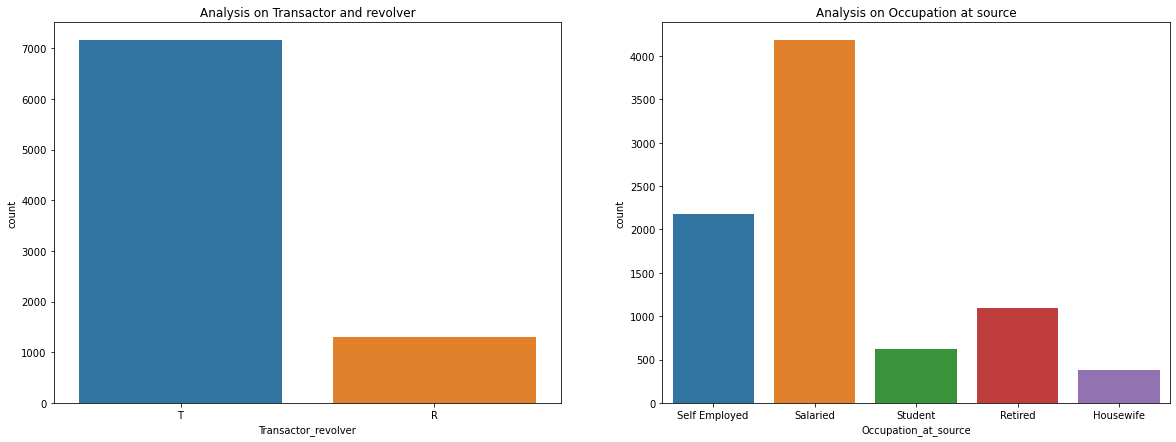

In [124]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,7))

sns.countplot(df['Transactor_revolver'],ax=axs[0])
sns.countplot(df['Occupation_at_source'],ax=axs[1])

axs[0].set_title('Analysis on Transactor and revolver')
axs[1].set_title('Analysis on Occupation at source')

plt.show()

### Multivariate Analysis

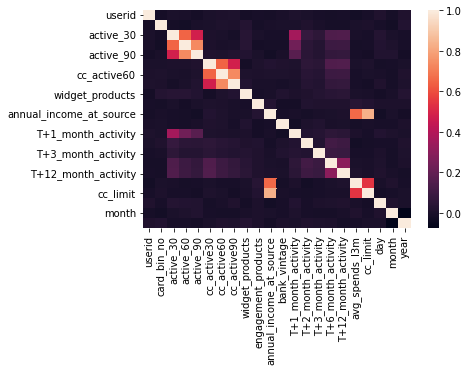

In [125]:
sns.heatmap(df.corr())
plt.show()

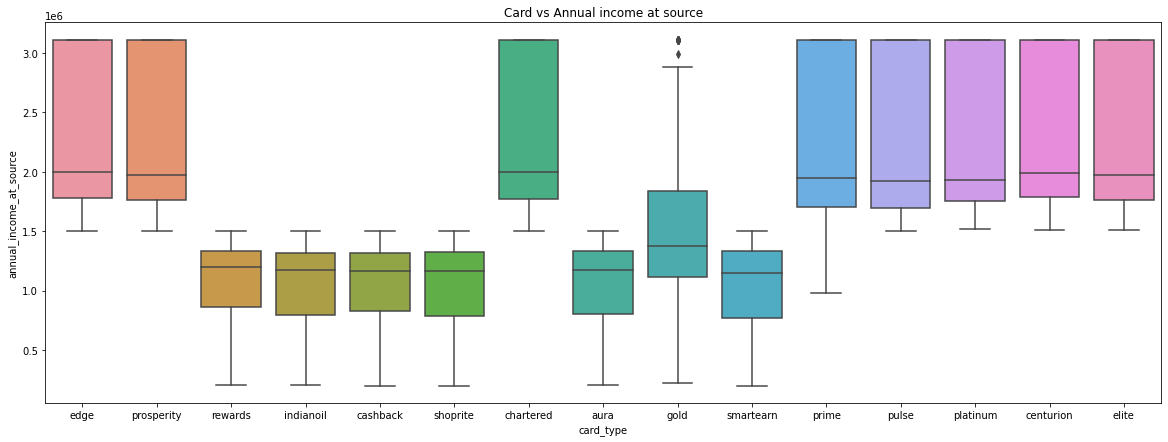

In [126]:
plt.figure(figsize=(20,7))
sns.boxplot(x=df['card_type'],y=df['annual_income_at_source'])

plt.title('Card vs Annual income at source')
plt.show()

**As income increases people are preferring - Edge, prosperity, Chartered, Prime, Pulse, Platinum, Centurion, Elite**

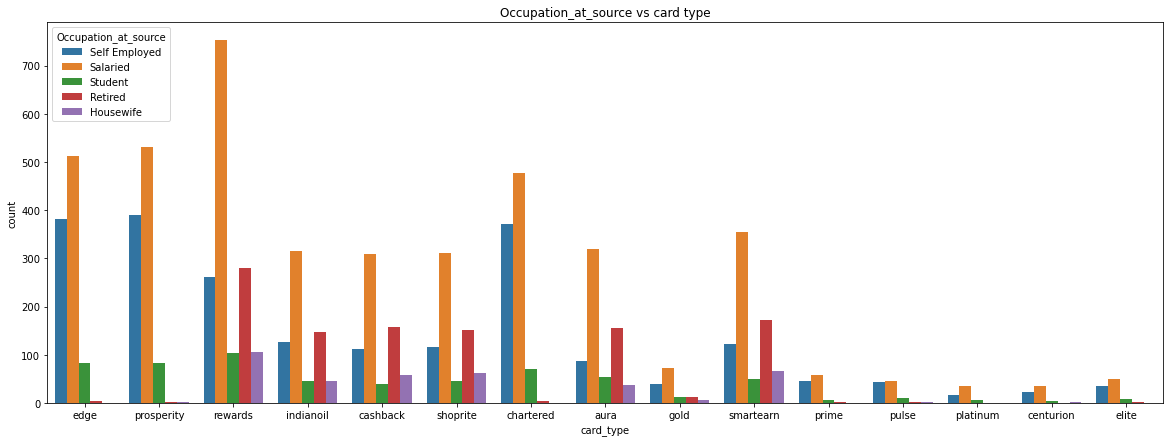

In [127]:
plt.figure(figsize=(20,7))
sns.countplot(hue=df['Occupation_at_source'],x=df['card_type'])
plt.title('Occupation_at_source vs card type')
plt.show()

Rewards card type is morely used by salaried people, students, retired and housewifives when compared to other types.

Self employeed are likely to select Prosperity.



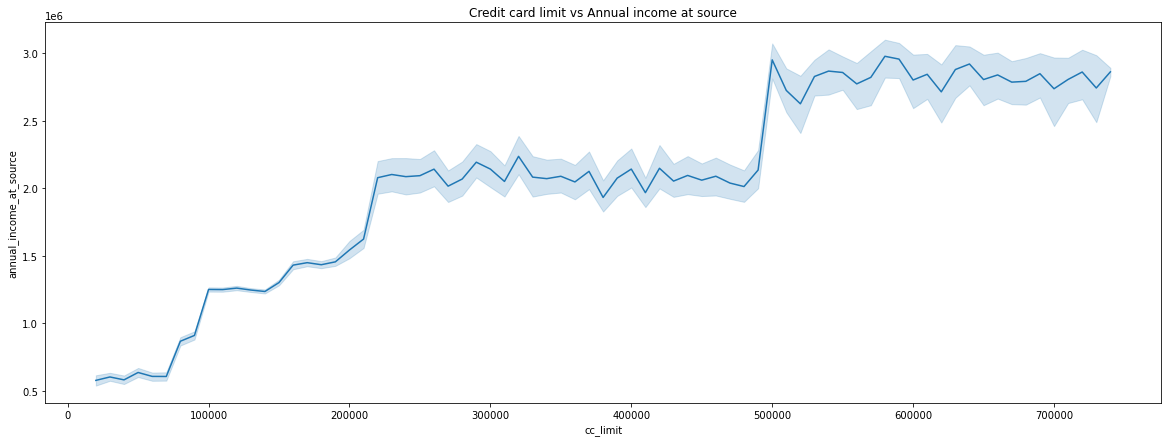

In [128]:
plt.figure(figsize=(20,7))
sns.lineplot(x=df['cc_limit'],y=df['annual_income_at_source'])

plt.title('Credit card limit vs Annual income at source')
plt.show()

**As income increases the credit limit increases**

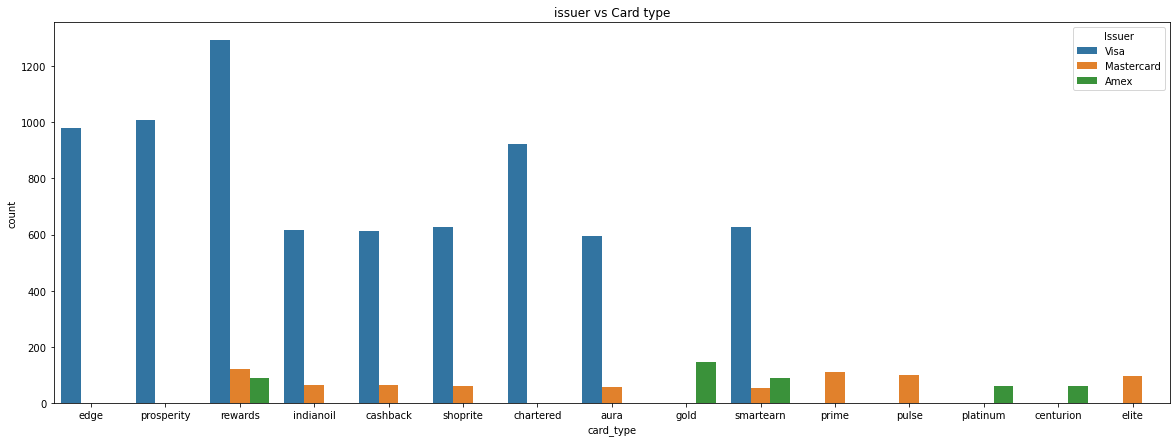

In [137]:
plt.figure(figsize=(20,7))
sns.countplot(hue=df['Issuer'],x=df['card_type'])

plt.title('issuer vs Card type')
plt.show()

Text(0.5, 1.0, 'Card type vs Year')

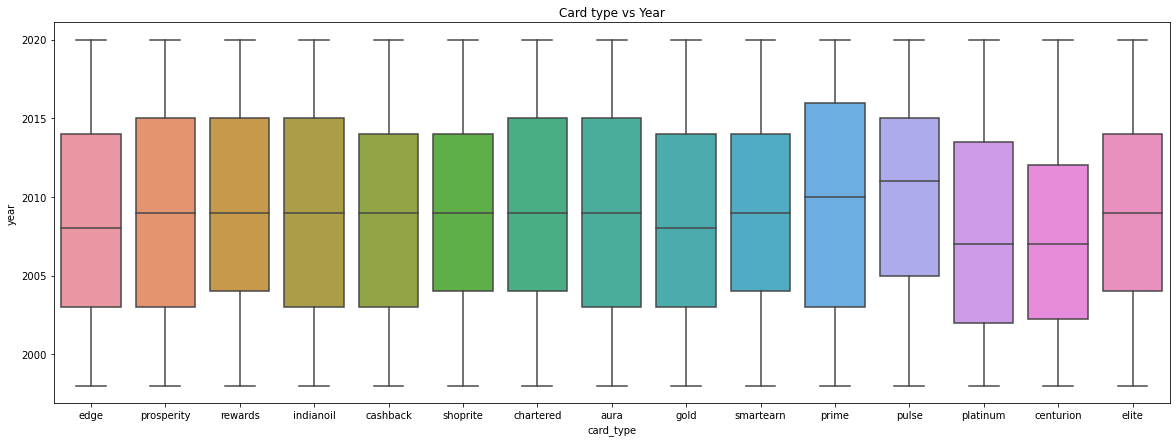

In [130]:
plt.figure(figsize=(20,7))
sns.boxplot(x=df['card_type'],y=df['year'])

plt.title('Card type vs Year')

Can't make much analysis in this card type.

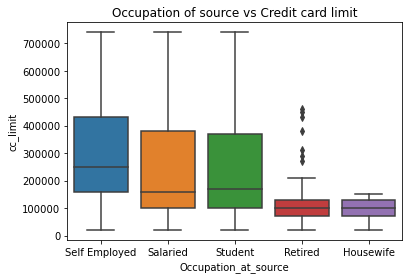

In [136]:
sns.boxplot(x=df['Occupation_at_source'],y=df['cc_limit'])
plt.title('Occupation of source vs Credit card limit')

plt.show()

From the above plot, 50% of self employed use 28,000.

The next salaried, student 50% of salaried people is less than 20,000.

Next comes, retired and housewife 50% of people is 15,000.

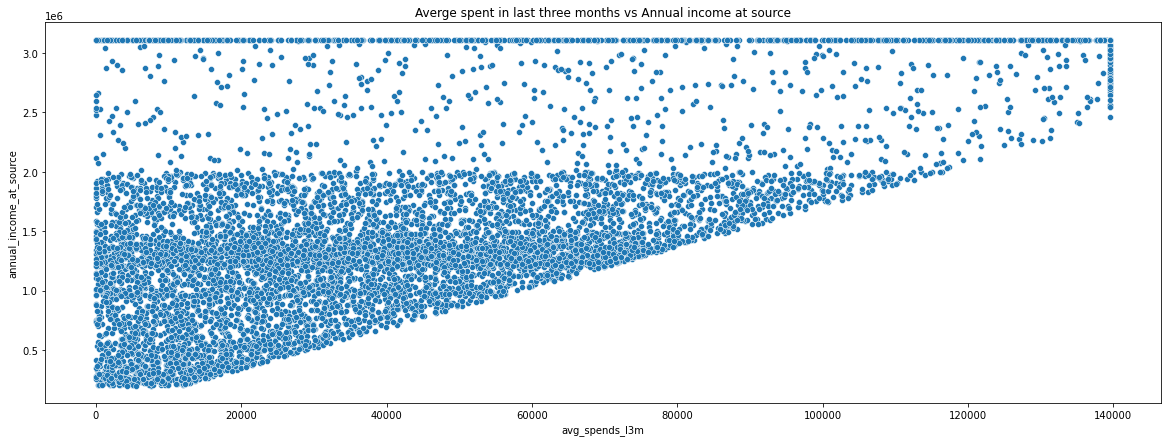

In [132]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=df['avg_spends_l3m'],y=df['annual_income_at_source'])

plt.title('Averge spent in last three months vs Annual income at source')
plt.show()

As income increases, average spent last 3 months also increases a bit.

There are people with high income, less average spent.

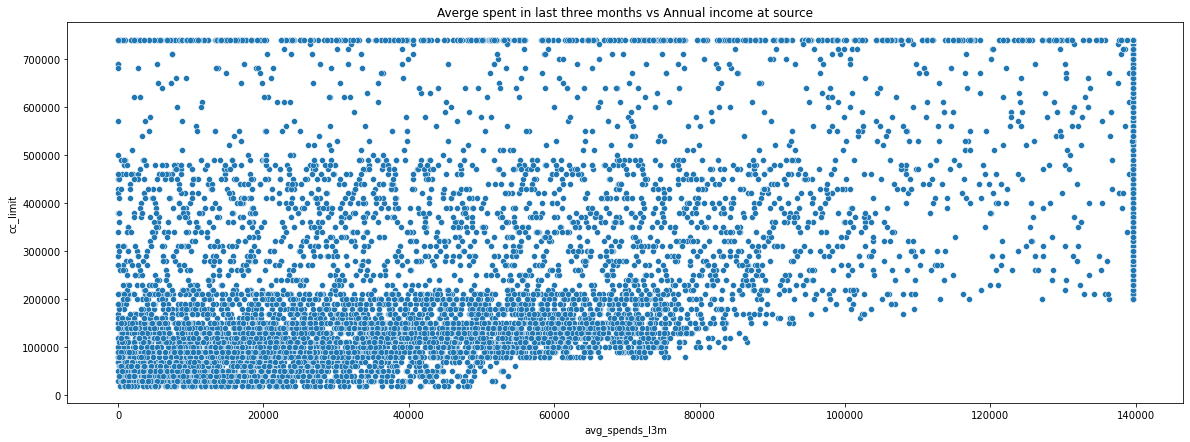

In [133]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=df['avg_spends_l3m'],y=df['cc_limit'])

plt.title('Averge spent in last three months vs Annual income at source')
plt.show()

There is a bit linear at high average spent.

As credit card limit increases, average spent increases.

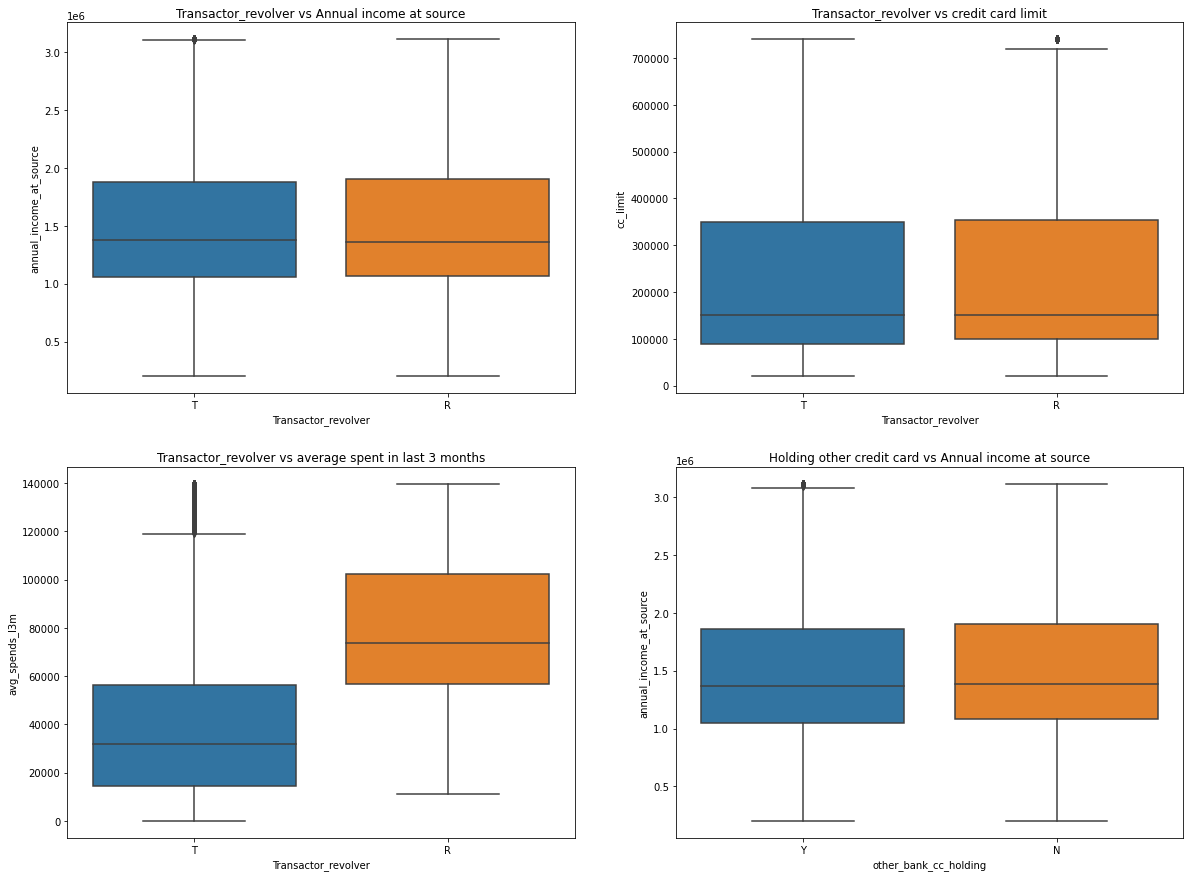

In [134]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,15))

sns.boxplot(x=df['Transactor_revolver'],y=df['annual_income_at_source'],ax=axs[0,0])
sns.boxplot(x=df['Transactor_revolver'],y=df['cc_limit'],ax=axs[0,1]);
sns.boxplot(x=df['Transactor_revolver'],y=df['avg_spends_l3m'],ax=axs[1,0]);
sns.boxplot(x=df['other_bank_cc_holding'],y=df['annual_income_at_source'],ax=axs[1,1])

axs[0,0].set_title('Transactor_revolver vs Annual income at source')
axs[0,1].set_title('Transactor_revolver vs credit card limit')
axs[1,0].set_title('Transactor_revolver vs average spent in last 3 months')
axs[1,1].set_title('Holding other credit card vs Annual income at source')

plt.show()

From the above plots - Transactor_revolver vs Annual income at source, Transactor_revolver vs credit card limit, Holding other credit card vs Annual income at source, there can't be much analysis done.

In Transactor_revolver vs average spent in last 3 months plot, we can say there are more revolvers than Transactor.

<AxesSubplot:xlabel='card_type', ylabel='avg_spends_l3m'>

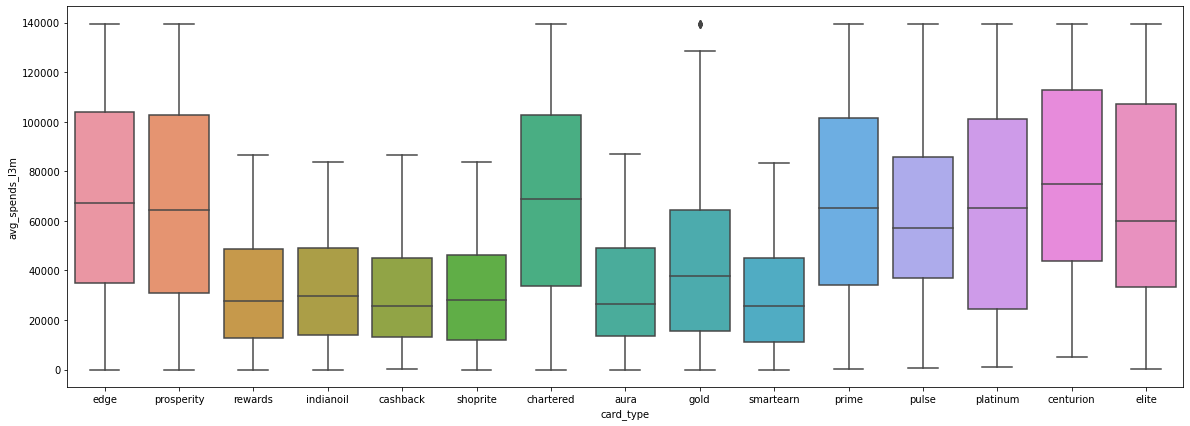

In [141]:
plt.figure(figsize=(20,7))
sns.boxplot(y=df['avg_spends_l3m'],x=df['card_type'])